# 1. Collecte de données

In [1]:
import time
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importation des modules pour le prétraitement des données
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Importation des modules pour l'évaluation des modèles
# et les méthodes d'apprentissage supervisé
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Importation des algorithmes d'apprentissage supervisé
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# Chargement des données à partir d'un fichier CSV dans un df "data"
data = pd.read_csv("hotel_bookings.csv")

# 2. Pré-Exploration EDA

In [3]:
# Affichage des premières lignes du df "data" pour visualiser les données
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Affichage des dimensions (nb lignes, nb colonnes)
data.shape

(119390, 32)

In [5]:
# Affichage des noms des colonnes
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Nombre de features dans notre dataframe
nb_features = data.shape[1]
print("Nombre de features:", nb_features)

# Nombre d'enregistrement
nb_enregistrements = data.shape[0]
print("Nombre d'enregistrements:", nb_enregistrements)

# Nombre de valeurs manquantes
nb_total_valeurs_manquantes = data.isnull().sum().sum()
print("Valeurs manquantes:", nb_total_valeurs_manquantes)

# Nombre total de cellules
nb_total_cellules = data.size

# Pourcentage de valeurs manquantes par rapport au nombre total de
# cellules
pourcentage_valeurs_manquantes = (nb_total_valeurs_manquantes / nb_total_cellules) * 100
print("Valeurs manquantes (%):", round(pourcentage_valeurs_manquantes,2))

# Variables qualitatives
features_qualitatives = data.select_dtypes(exclude="number").columns
nb_features_qualitatives = len(features_qualitatives)
print("Features qualitatives:", nb_features_qualitatives)

# Variables quantitatives (numériques)
features_quantitatives = data.select_dtypes(include="number").columns
nb_features_quantitatives = len(features_quantitatives)
print("Features quantitatives:", nb_features_quantitatives)

Nombre de features: 32
Nombre d'enregistrements: 119390
Valeurs manquantes: 129425
Valeurs manquantes (%): 3.39
Features qualitatives: 12
Features quantitatives: 20


In [9]:
# Calculer le nombre de valeurs nulles par features
null_counts = data.isnull().sum()

# Calculer le pourcentage de valeurs nulles par colonne
null_pourcentage = null_counts / len(data) *100

# Créer un DataFrame pour stocker les résultats

null_df = pd.DataFrame({"Valeurs nulles:" : null_counts, "Pourcentage de valeurs nulles:": null_pourcentage})
print(null_df)

                                Valeurs nulles:  \
hotel                                         0   
is_canceled                                   0   
lead_time                                     0   
arrival_date_year                             0   
arrival_date_month                            0   
arrival_date_week_number                      0   
arrival_date_day_of_month                     0   
stays_in_weekend_nights                       0   
stays_in_week_nights                          0   
adults                                        0   
children                                      4   
babies                                        0   
meal                                          0   
country                                     488   
market_segment                                0   
distribution_channel                          0   
is_repeated_guest                             0   
previous_cancellations                        0   
previous_bookings_not_canceled 

In [10]:
# Calculer le nombre de valeurs uniques par features
unique_counts = data.apply(lambda col: col.nunique())


# Créer un DataFrame pour stocker les résultats

unique_df = pd.DataFrame({"Uniques Values:" : unique_counts})
print(unique_df)

                                Uniques Values:
hotel                                         2
is_canceled                                   2
lead_time                                   479
arrival_date_year                             3
arrival_date_month                           12
arrival_date_week_number                     53
arrival_date_day_of_month                    31
stays_in_weekend_nights                      17
stays_in_week_nights                         35
adults                                       14
children                                      5
babies                                        5
meal                                          5
country                                     177
market_segment                                8
distribution_channel                          5
is_repeated_guest                             2
previous_cancellations                       15
previous_bookings_not_canceled               73
reserved_room_type                      

In [11]:
# Liste des colonnes spécifiques à partir desquelles les valeurs uniques seront extraites
colonnes_specifiques = ['hotel', 'is_canceled', 'arrival_date_year', 'adults', 'children', 'babies',
                        'meal', 'deposit_type', 'customer_type', 'reservation_status',
                        'required_car_parking_spaces', 'total_of_special_requests', 'distribution_channel', 'reserved_room_type','assigned_room_type']

# Extraction des valeurs uniques pour chaque colonne
uniques_values_data = data[colonnes_specifiques].apply(lambda x: pd.unique(x))

# Affichage des valeurs uniques pour chaque colonne
print(uniques_values_data)

hotel                                                 [Resort Hotel, City Hotel]
is_canceled                                                               [0, 1]
arrival_date_year                                             [2015, 2016, 2017]
adults                         [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                         [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                          [0, 1, 2, 10, 9]
meal                                                 [BB, FB, HB, SC, Undefined]
deposit_type                                [No Deposit, Refundable, Non Refund]
customer_type                      [Transient, Contract, Transient-Party, Group]
reservation_status                                [Check-Out, Canceled, No-Show]
required_car_parking_spaces                                      [0, 1, 2, 8, 3]
total_of_special_requests                                     [0, 1, 3, 2, 4, 5]
distribution_channel        

<Axes: >

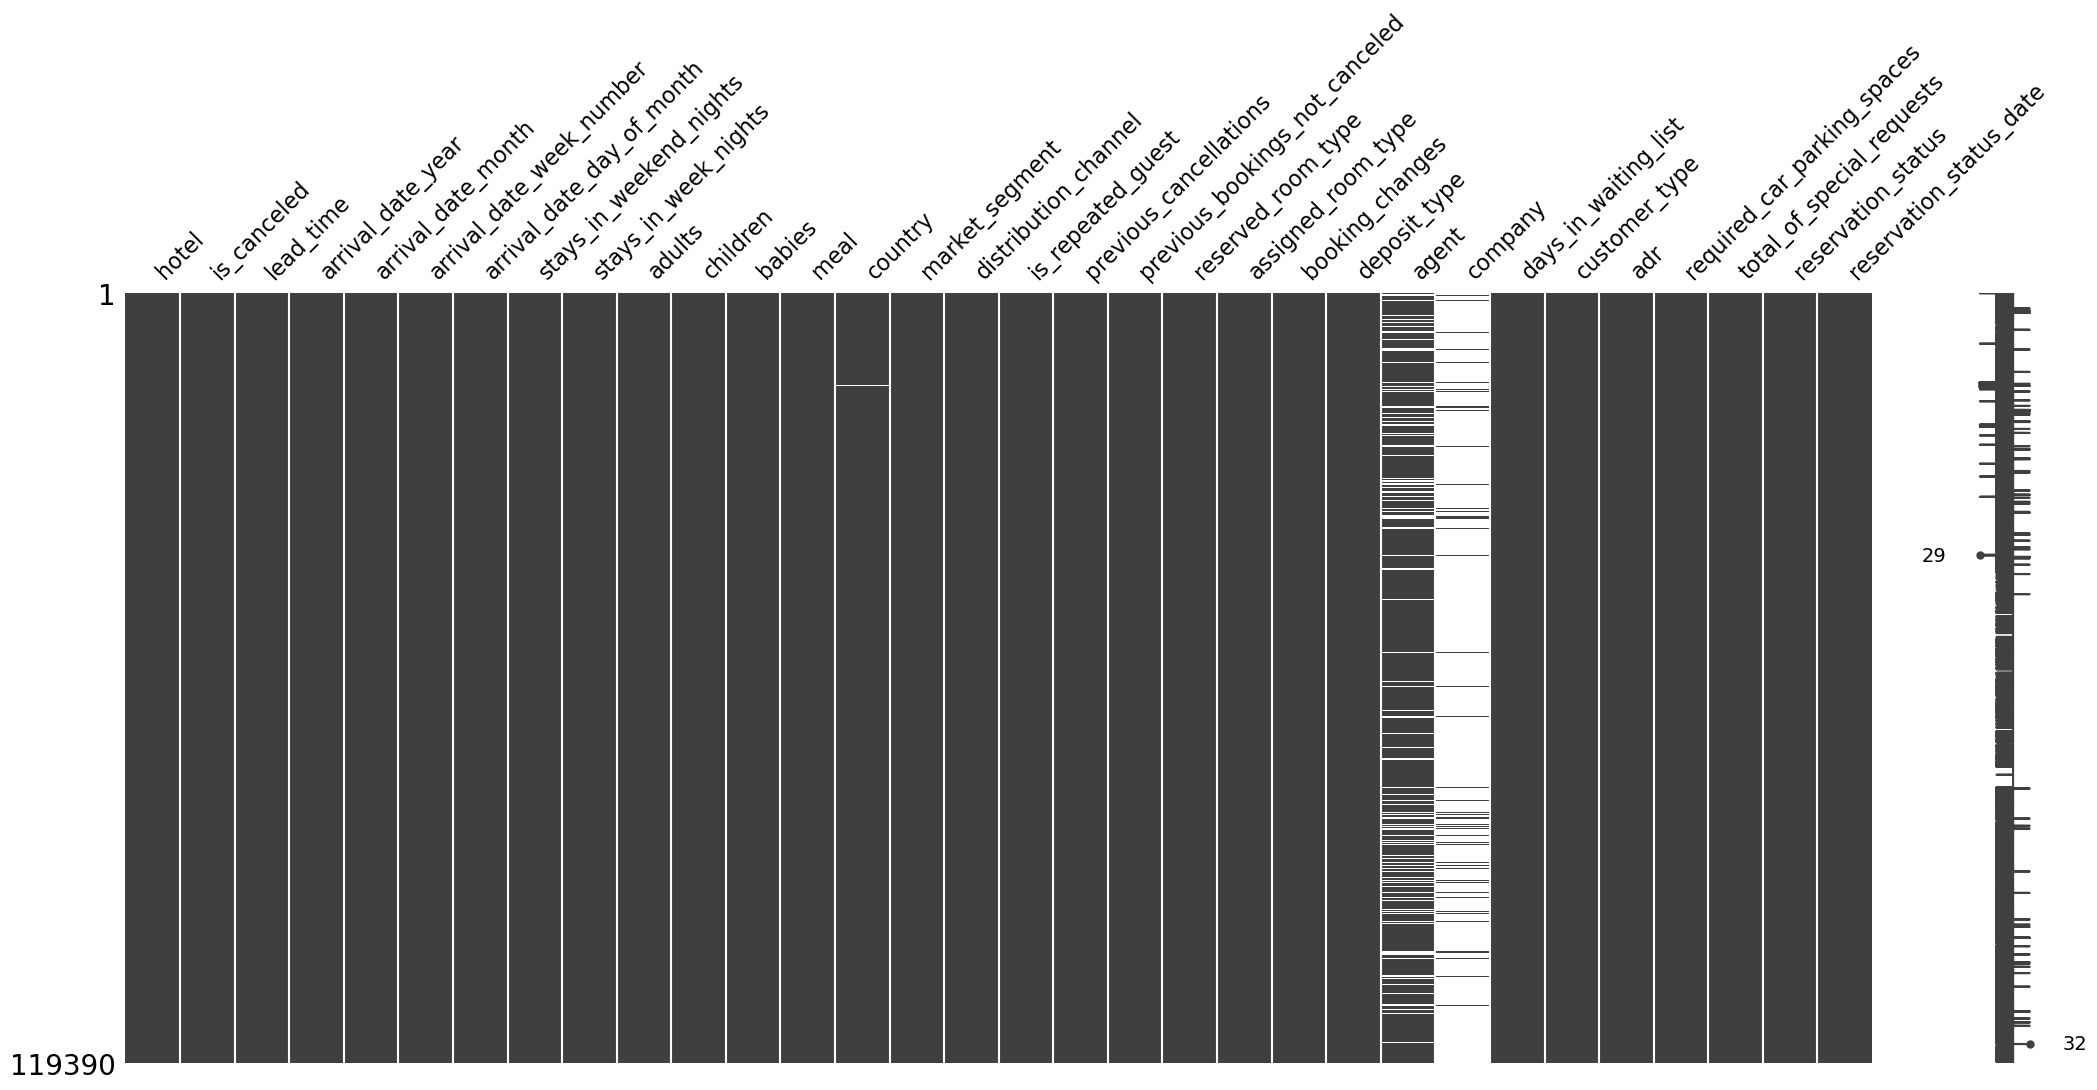

In [12]:
# Utilisation de la fonction matrix() pour visualier les données manquantes dans le df "data"
msno.matrix(data)

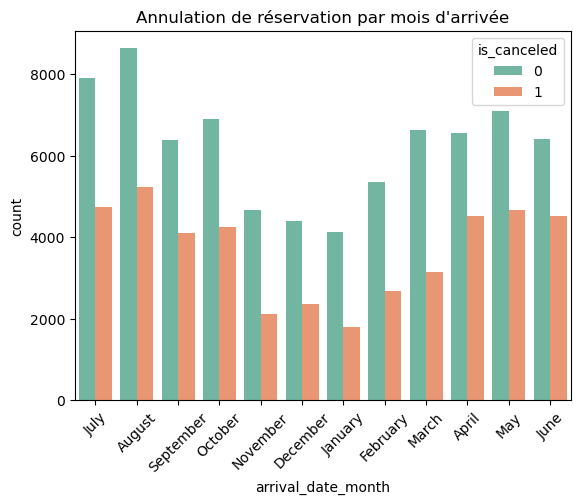

In [13]:
# Diagramme à barres pour les annulations par mois d'arrivée
sns.countplot(x="arrival_date_month", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par mois d'arrivée")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Distribution du ADR')

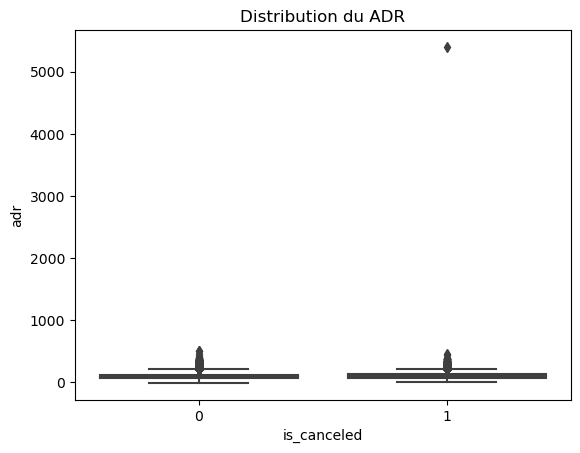

In [14]:
# Diagramme en boîte pour les tarifs journaliers (ADR)
sns.boxplot(x="is_canceled", y="adr", data=data)
plt.title("Distribution du ADR")

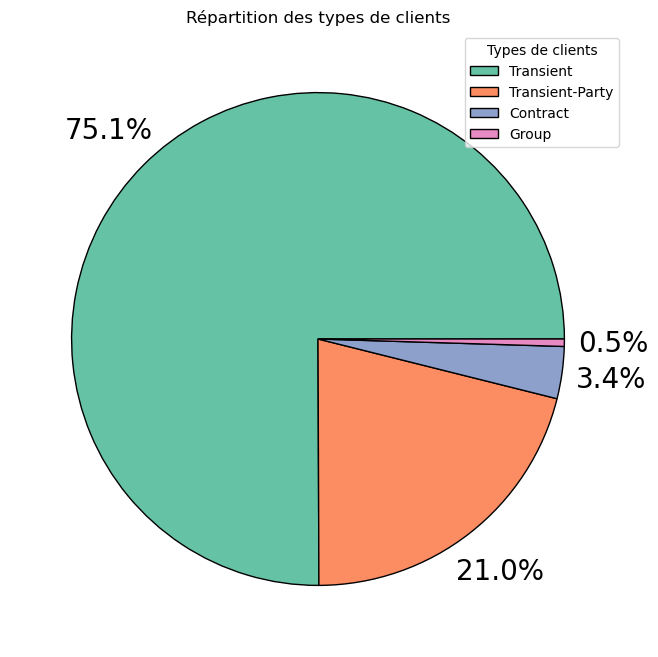

In [15]:
# Diagramme circulaire de la répartition des types de clients
plt.figure(figsize=(8,8))
plt.pie(data["customer_type"].value_counts(), autopct="%1.1f%%", colors=sns.color_palette("Set2"), wedgeprops={"linewidth":1, "edgecolor": "black"}, textprops={"fontsize":20}, pctdistance=1.2)
plt.title("Répartition des types de clients")
plt.legend(data["customer_type"].value_counts().index, title="Types de clients", loc="upper right")
plt.show()

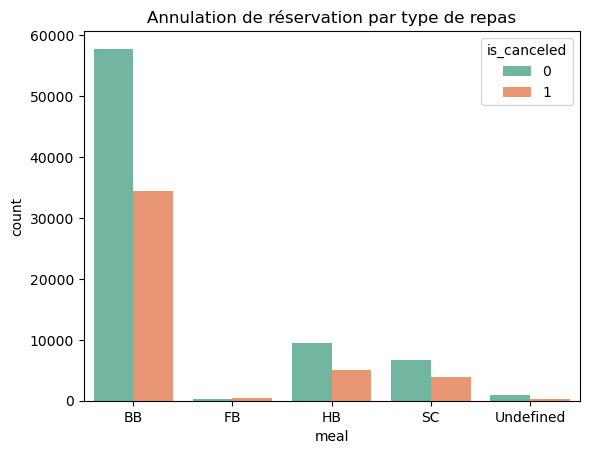

In [16]:
# Diagramme à barre des annulations de réservation par type de repas
sns.countplot(x="meal", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par type de repas")
plt.show()

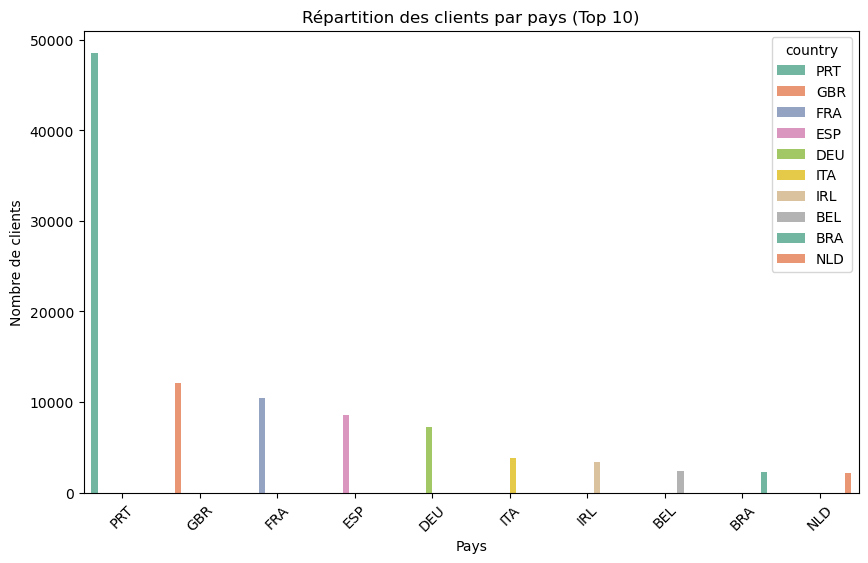

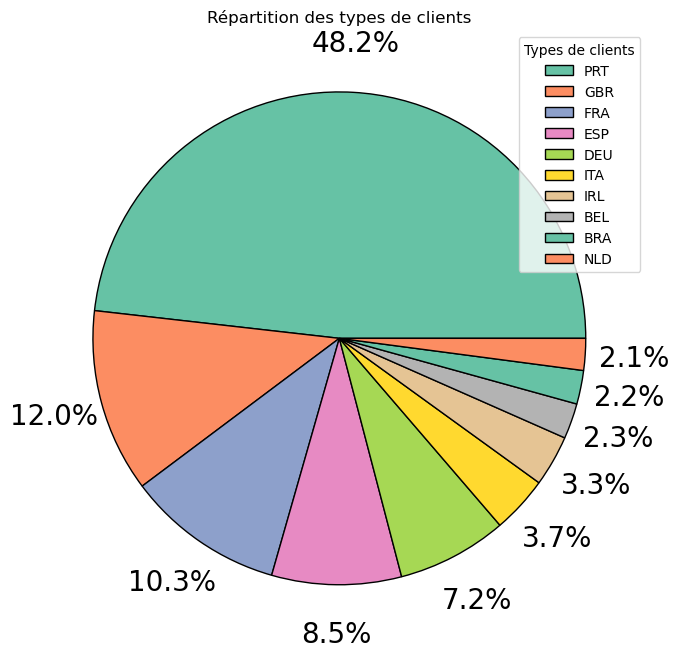

In [17]:
top_countries = data['country'].value_counts().head(10)

# Diagramme à barre de la répartition des clients par pays (Top 10 des pays)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Set2", hue=top_countries.index)
plt.title("Répartition des clients par pays (Top 10)")
plt.xlabel("Pays")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)
plt.show()

# Diagramme circulaire de la répartition des clients pas pays
plt.figure(figsize=(8,8))
plt.pie(top_countries, autopct="%1.1f%%", colors=sns.color_palette("Set2"), wedgeprops={"linewidth":1, "edgecolor": "black"}, textprops={"fontsize":20}, pctdistance=1.2)
plt.title("Répartition des types de clients")
plt.legend(top_countries.index, title="Types de clients", loc="upper right")
plt.show()

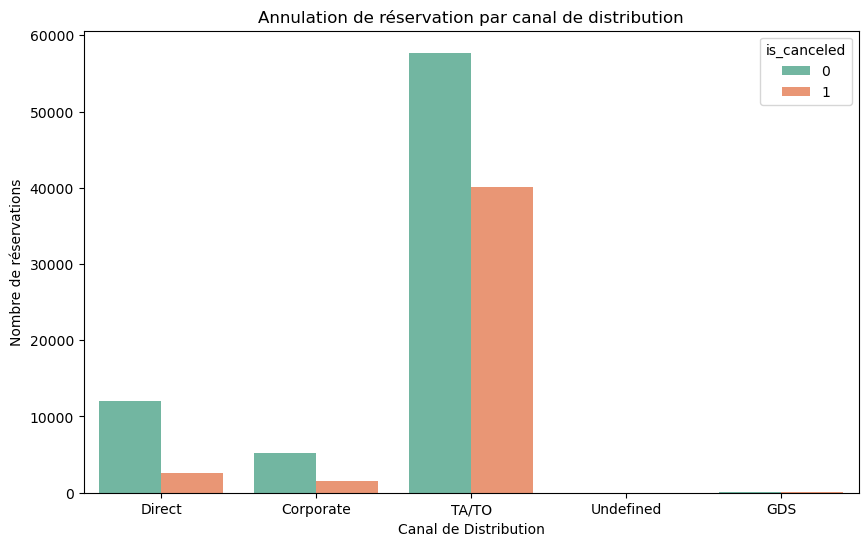

In [18]:
# Diagramme à barre des annulations de réservations par canal de distribution
plt.figure(figsize=(10,6))
sns.countplot(x="distribution_channel", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par canal de distribution")
plt.xlabel("Canal de Distribution")
plt.ylabel("Nombre de réservations")
plt.legend(title="is_canceled")
plt.show()

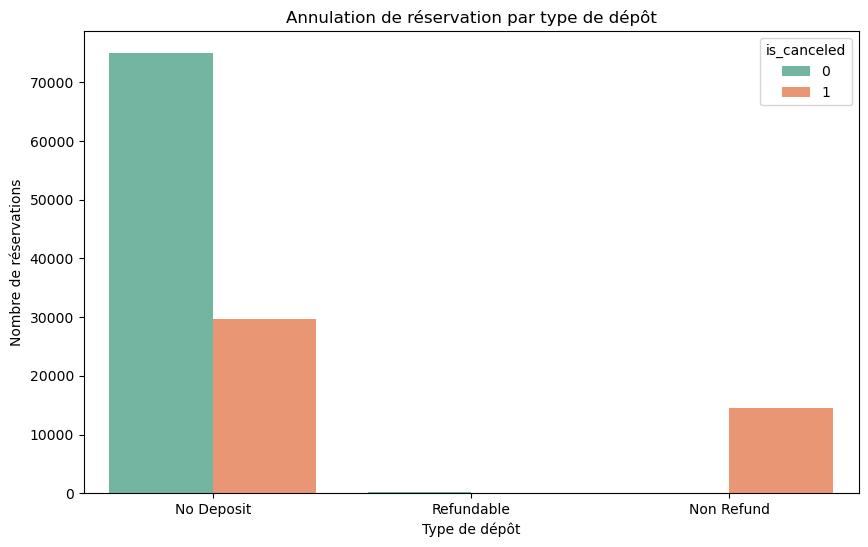

In [19]:
# Diagramme à barre des annulations de réservation par type de dépôt
plt.figure(figsize=(10,6))
sns.countplot(x="deposit_type", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par type de dépôt")
plt.xlabel("Type de dépôt")
plt.ylabel("Nombre de réservations")
plt.show()

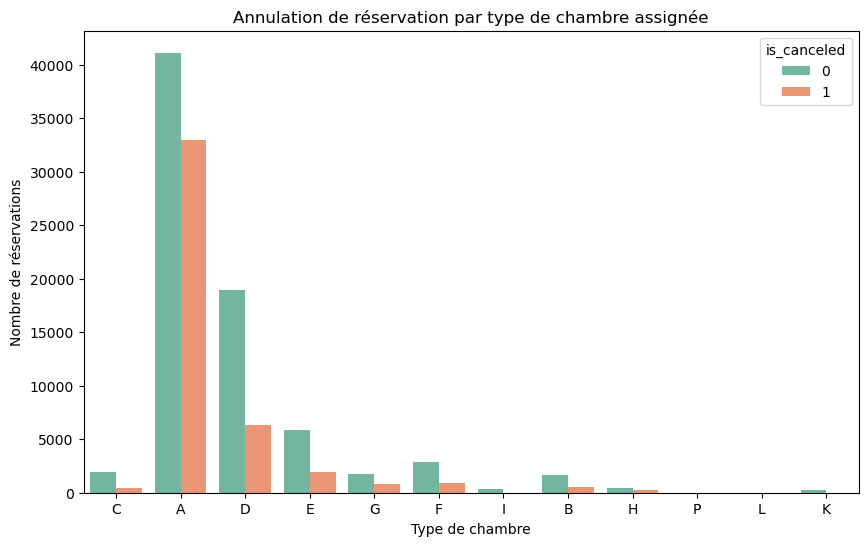

In [20]:
# Diagramme à barre des annulations de réservation par type de chambre assignée
plt.figure(figsize=(10,6))
sns.countplot(x="assigned_room_type", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par type de chambre assignée")
plt.xlabel("Type de chambre")
plt.ylabel("Nombre de réservations")
plt.show()

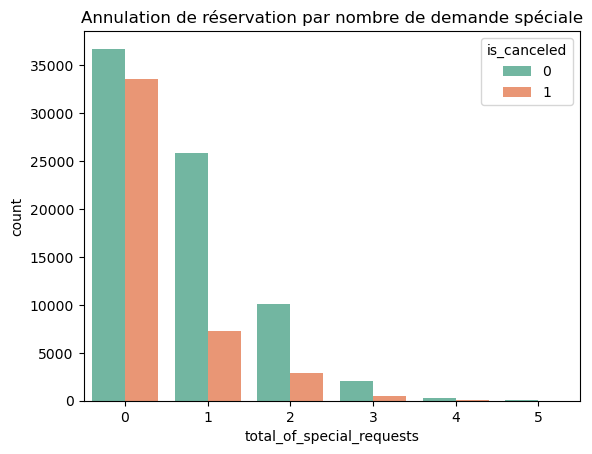

In [21]:
# Diagramme à barre des annulations de réservation par nombre de demande spéciale
sns.countplot(x="total_of_special_requests", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par nombre de demande spéciale")
plt.show()

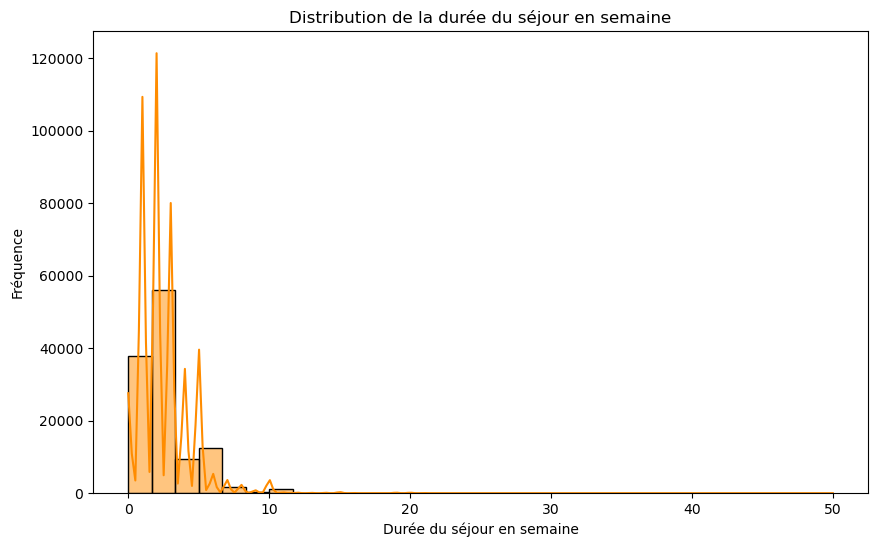

In [22]:
# Histogramme de la durée du séjour en semaine
plt.figure(figsize=(10,6))
sns.histplot(data=data, x="stays_in_week_nights", bins=30, kde=True, color="darkorange")
plt.title("Distribution de la durée du séjour en semaine")
plt.xlabel("Durée du séjour en semaine")
plt.ylabel("Fréquence")
plt.show()

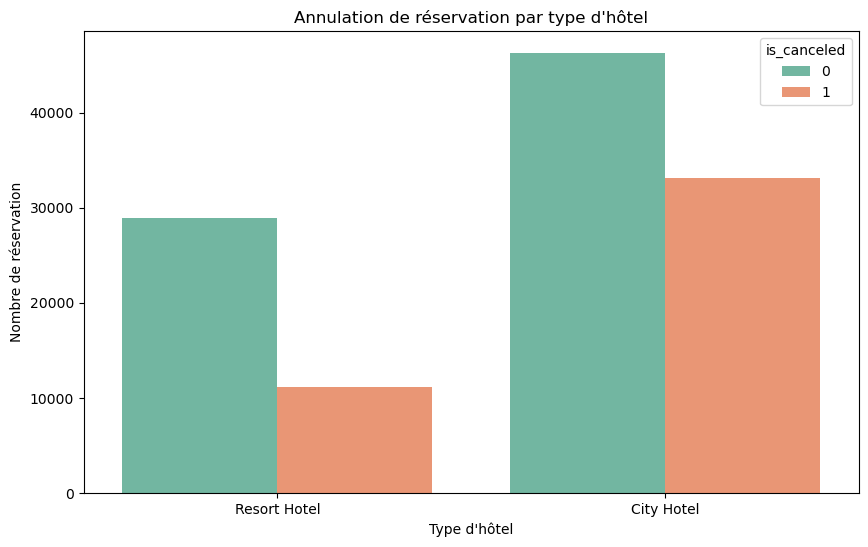

In [23]:
# Diagramme à barre des annulations de réservation par type d'hôtel
plt.figure(figsize=(10,6))
sns.countplot(x="hotel", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par type d'hôtel")
plt.xlabel("Type d'hôtel")
plt.ylabel("Nombre de réservation")
plt.show()

**Combien de réservation ont été annulées?**

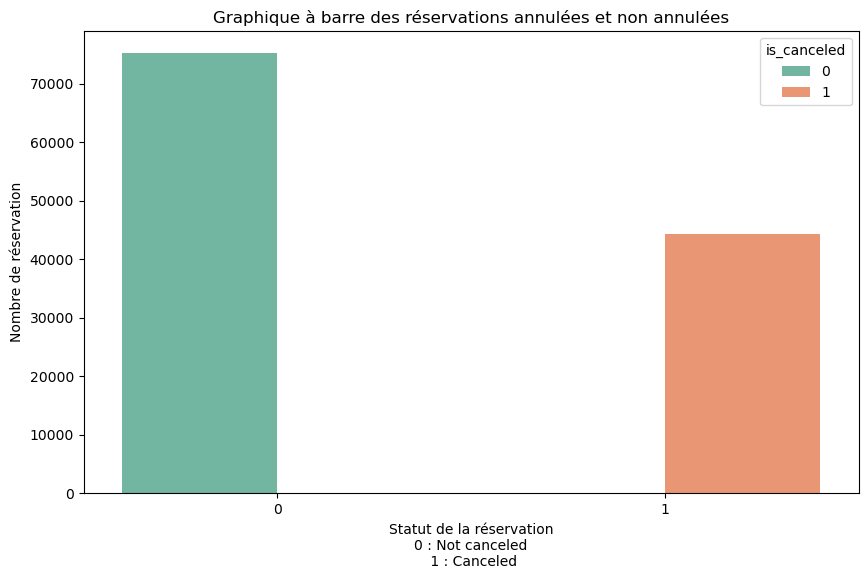

In [24]:
# Diagramme à barre des réservations annulées et non annulées

plt.figure(figsize=(10,6))
sns.countplot(x="is_canceled", data=data, palette="Set2", hue=data["is_canceled"])
plt.title("Graphique à barre des réservations annulées et non annulées")
plt.xlabel("Statut de la réservation\n0 : Not canceled\n 1 : Canceled")
plt.ylabel("Nombre de réservation")
plt.show()

**Quel type de dépôt est le plus couramment utilisé dans les réservations?**

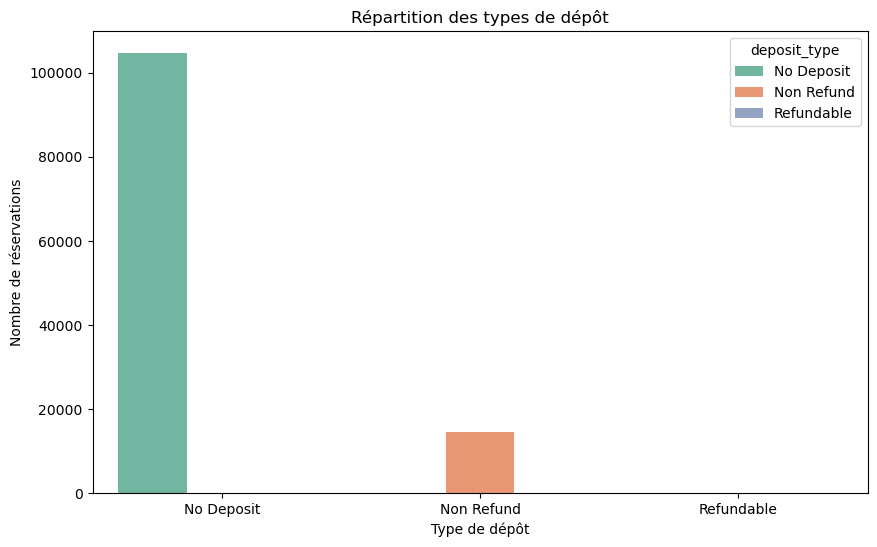

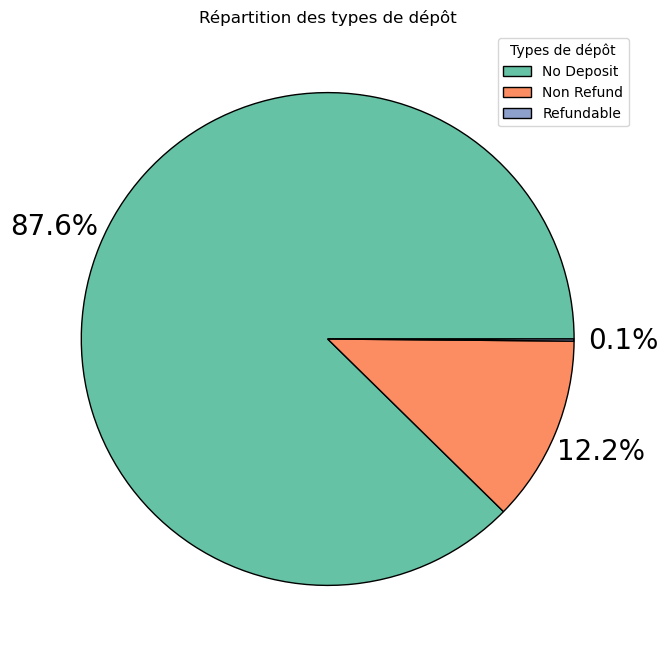

In [25]:
# Compter le nombre de réservations pour chaque type de dépôt
deposit_counts = data["deposit_type"].value_counts()

# Diagramme à barre de la répartition des types de dépôt
plt.figure(figsize=(10,6))
sns.barplot(x=deposit_counts.index, y=deposit_counts.values, palette="Set2", hue=deposit_counts.index)
plt.title("Répartition des types de dépôt")
plt.xlabel("Type de dépôt")
plt.ylabel("Nombre de réservations")
plt.show()

# Diagramme circulaire de la répartition des types de dépôt
plt.figure(figsize=(8,8))
plt.pie(deposit_counts, autopct="%1.1f%%", colors=sns.color_palette("Set2"), wedgeprops={"linewidth":1, "edgecolor": "black"}, textprops={"fontsize":20}, pctdistance=1.2)
plt.title("Répartition des types de dépôt")
plt.legend(deposit_counts.index, title="Types de dépôt", loc="upper right")
plt.show()

**Quels types de chambres sont les plus demandés?**

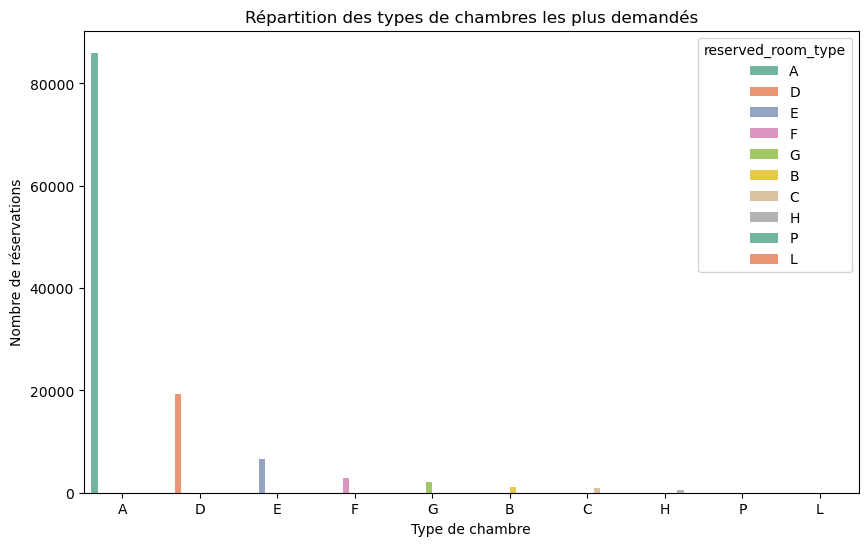

In [26]:
# Compter le nombre de réservations pour chaque type de chambre
room_type_counts = data['reserved_room_type'].value_counts()

# Diagramme à barres pour visualiser les types de chambres les plus demandés
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette="Set2", hue=room_type_counts.index)
plt.title("Répartition des types de chambres les plus demandés")
plt.xlabel("Type de chambre")
plt.ylabel("Nombre de réservations")
plt.xticks(rotation=0)
plt.show()

**D'où viennent le plus grand nombre d'hôtes?**

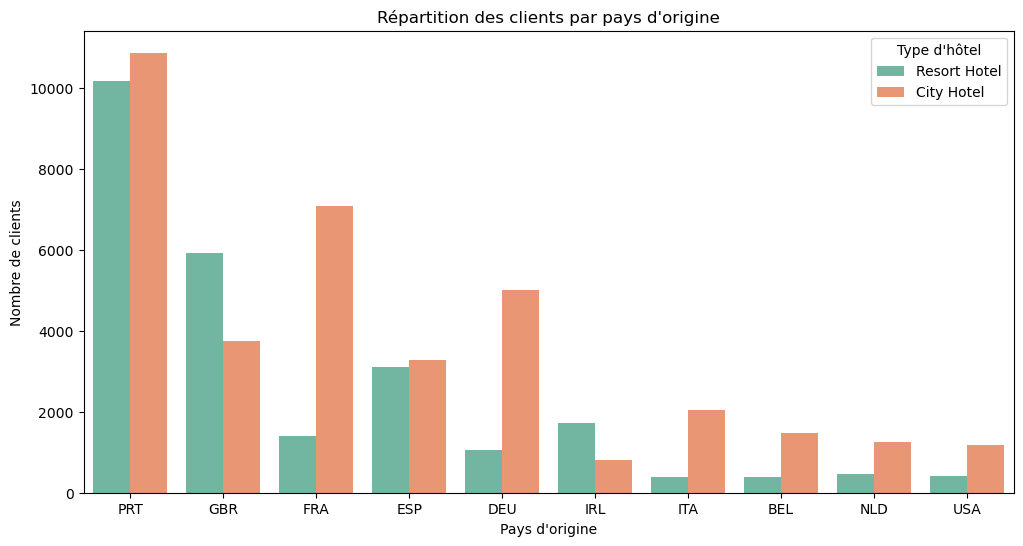

In [27]:
# Filtrer les lignes où is_canceled est égal à 0
non_canceled_data = data[data['is_canceled'] == 0]

# Diagramme à barres pour les deux types d'hôtels
plt.figure(figsize=(12, 6))
sns.countplot(data=non_canceled_data, x='country', hue='hotel', order=non_canceled_data['country'].value_counts().index[:10], palette="Set2")
plt.title("Répartition des clients par pays d'origine")
plt.xlabel("Pays d'origine")
plt.ylabel("Nombre de clients")
plt.legend(title="Type d'hôtel", loc='upper right')
plt.show()

**Combien les clients paient-ils pour une chambre de nuit?**

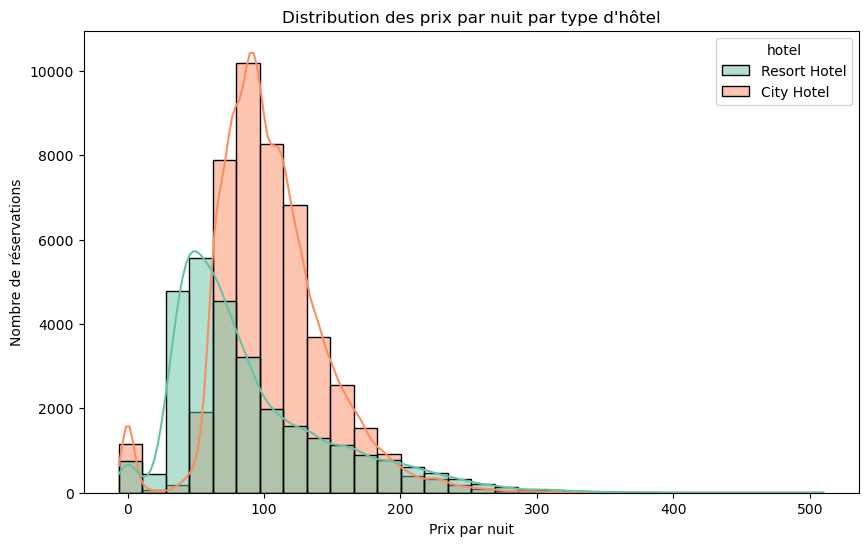

In [28]:
# Histogramme de la distribution des prix par nuit par type d'hôtel
plt.figure(figsize=(10, 6))
sns.histplot(data=non_canceled_data, x='adr', bins=30, hue='hotel', palette="Set2", kde=True)
plt.title("Distribution des prix par nuit par type d'hôtel")
plt.xlabel("Prix par nuit")
plt.ylabel("Nombre de réservations")
plt.show()

**Comment le prix varie-t-il par nuit au cours de l'année?**

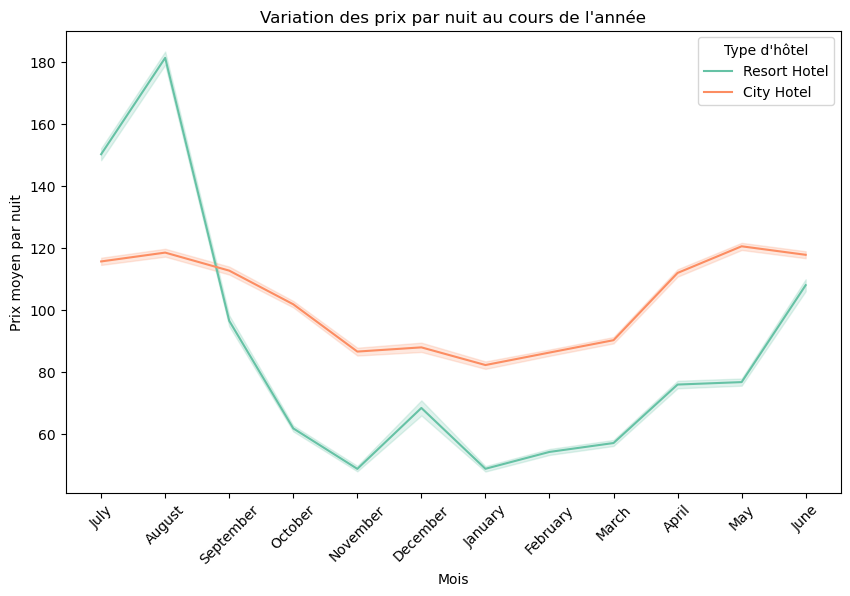

In [29]:
# Graphique de ligne représentant la variation des prix par nuit en fonction du mois, en distinguant les types d'hôtels
plt.figure(figsize=(10, 6))
sns.lineplot(data=non_canceled_data, x='arrival_date_month', y='adr', hue='hotel', markers=True, palette="Set2")
plt.title("Variation des prix par nuit au cours de l'année")
plt.xlabel("Mois")
plt.ylabel("Prix moyen par nuit")
plt.xticks(rotation=45)
plt.legend(title="Type d'hôtel", loc='upper right')
plt.show()

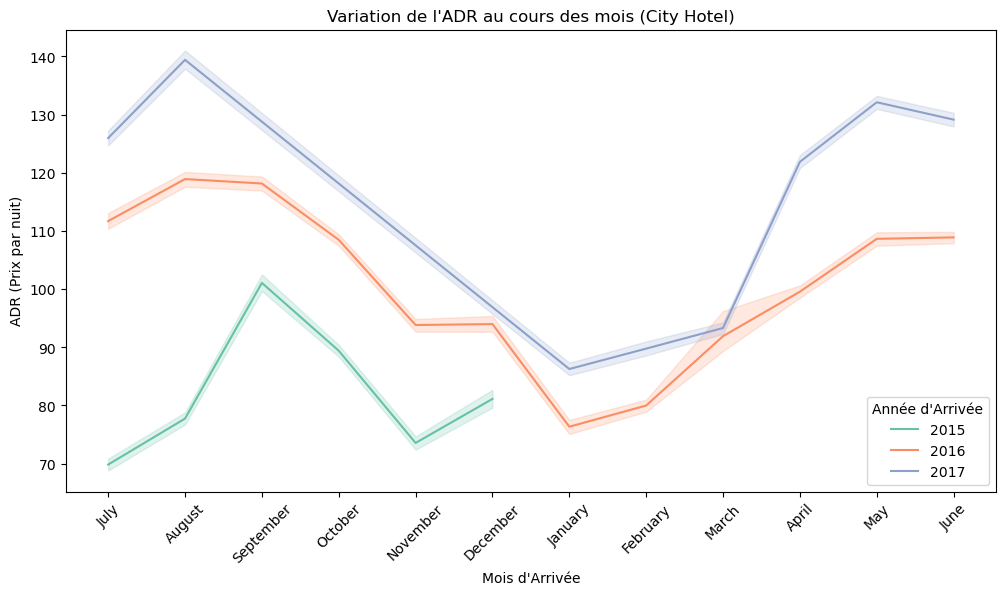

In [30]:
# Filtrer les données pour le type d'hôtel "City Hotel"
city_hotel_data = data[data['hotel'] == 'City Hotel']

# Graphique de ligne représentant la variation de l'ADR des "City Hotel" en fonction des mois
# avec des courbes distinctes pour chaque année
plt.figure(figsize=(12, 6))
sns.lineplot(data=city_hotel_data, x="arrival_date_month", y="adr", hue="arrival_date_year", palette="Set2")
plt.title("Variation de l'ADR au cours des mois (City Hotel)")
plt.xlabel("Mois d'Arrivée")
plt.ylabel("ADR (Prix par nuit)")
plt.xticks(rotation=45)
plt.legend(title="Année d'Arrivée")
plt.show()

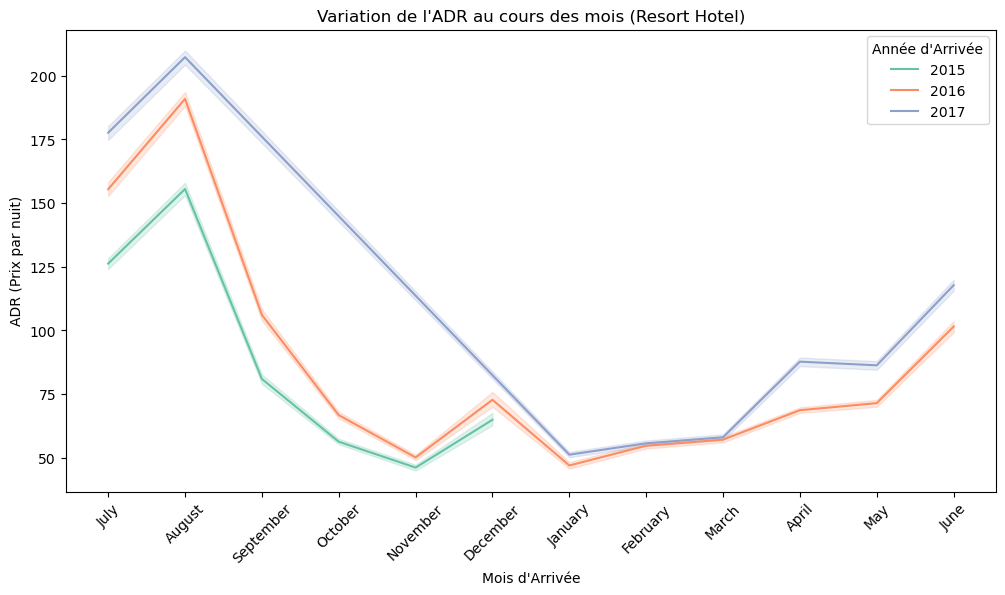

In [31]:
# Filtrer les données pour le type d'hôtel "Resort Hotel"
resort_hotel_data = data[data['hotel'] == 'Resort Hotel']

# Graphique de ligne représentant la variation de l'ADR des "Resort Hotel" en fonction des mois
# avec des courbes distinctes pour chaque année
plt.figure(figsize=(12, 6))
sns.lineplot(data=resort_hotel_data, x="arrival_date_month", y="adr", hue="arrival_date_year", palette="Set2")
plt.title("Variation de l'ADR au cours des mois (Resort Hotel)")
plt.xlabel("Mois d'Arrivée")
plt.ylabel("ADR (Prix par nuit)")
plt.xticks(rotation=45)
plt.legend(title="Année d'Arrivée")
plt.show()

**Quels sont les mois les plus chargés?**

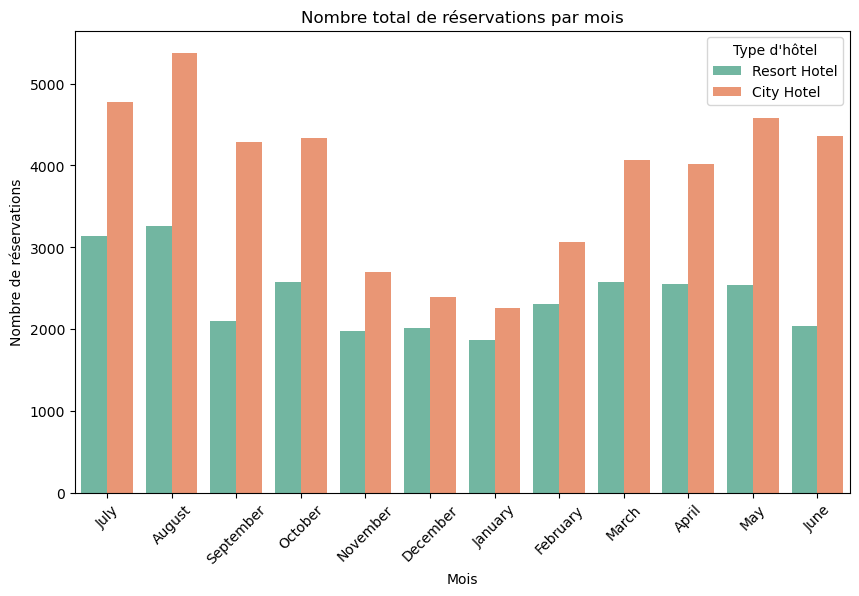

In [32]:
# Countplot représentant le nombre total de réservation par mois, en distinguant le type d'hôtel
plt.figure(figsize=(10, 6))
sns.countplot(data=non_canceled_data, x='arrival_date_month', hue='hotel', palette="Set2")
plt.title("Nombre total de réservations par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de réservations")
plt.xticks(rotation=45)
plt.legend(title="Type d'hôtel", loc='upper right')
plt.show()

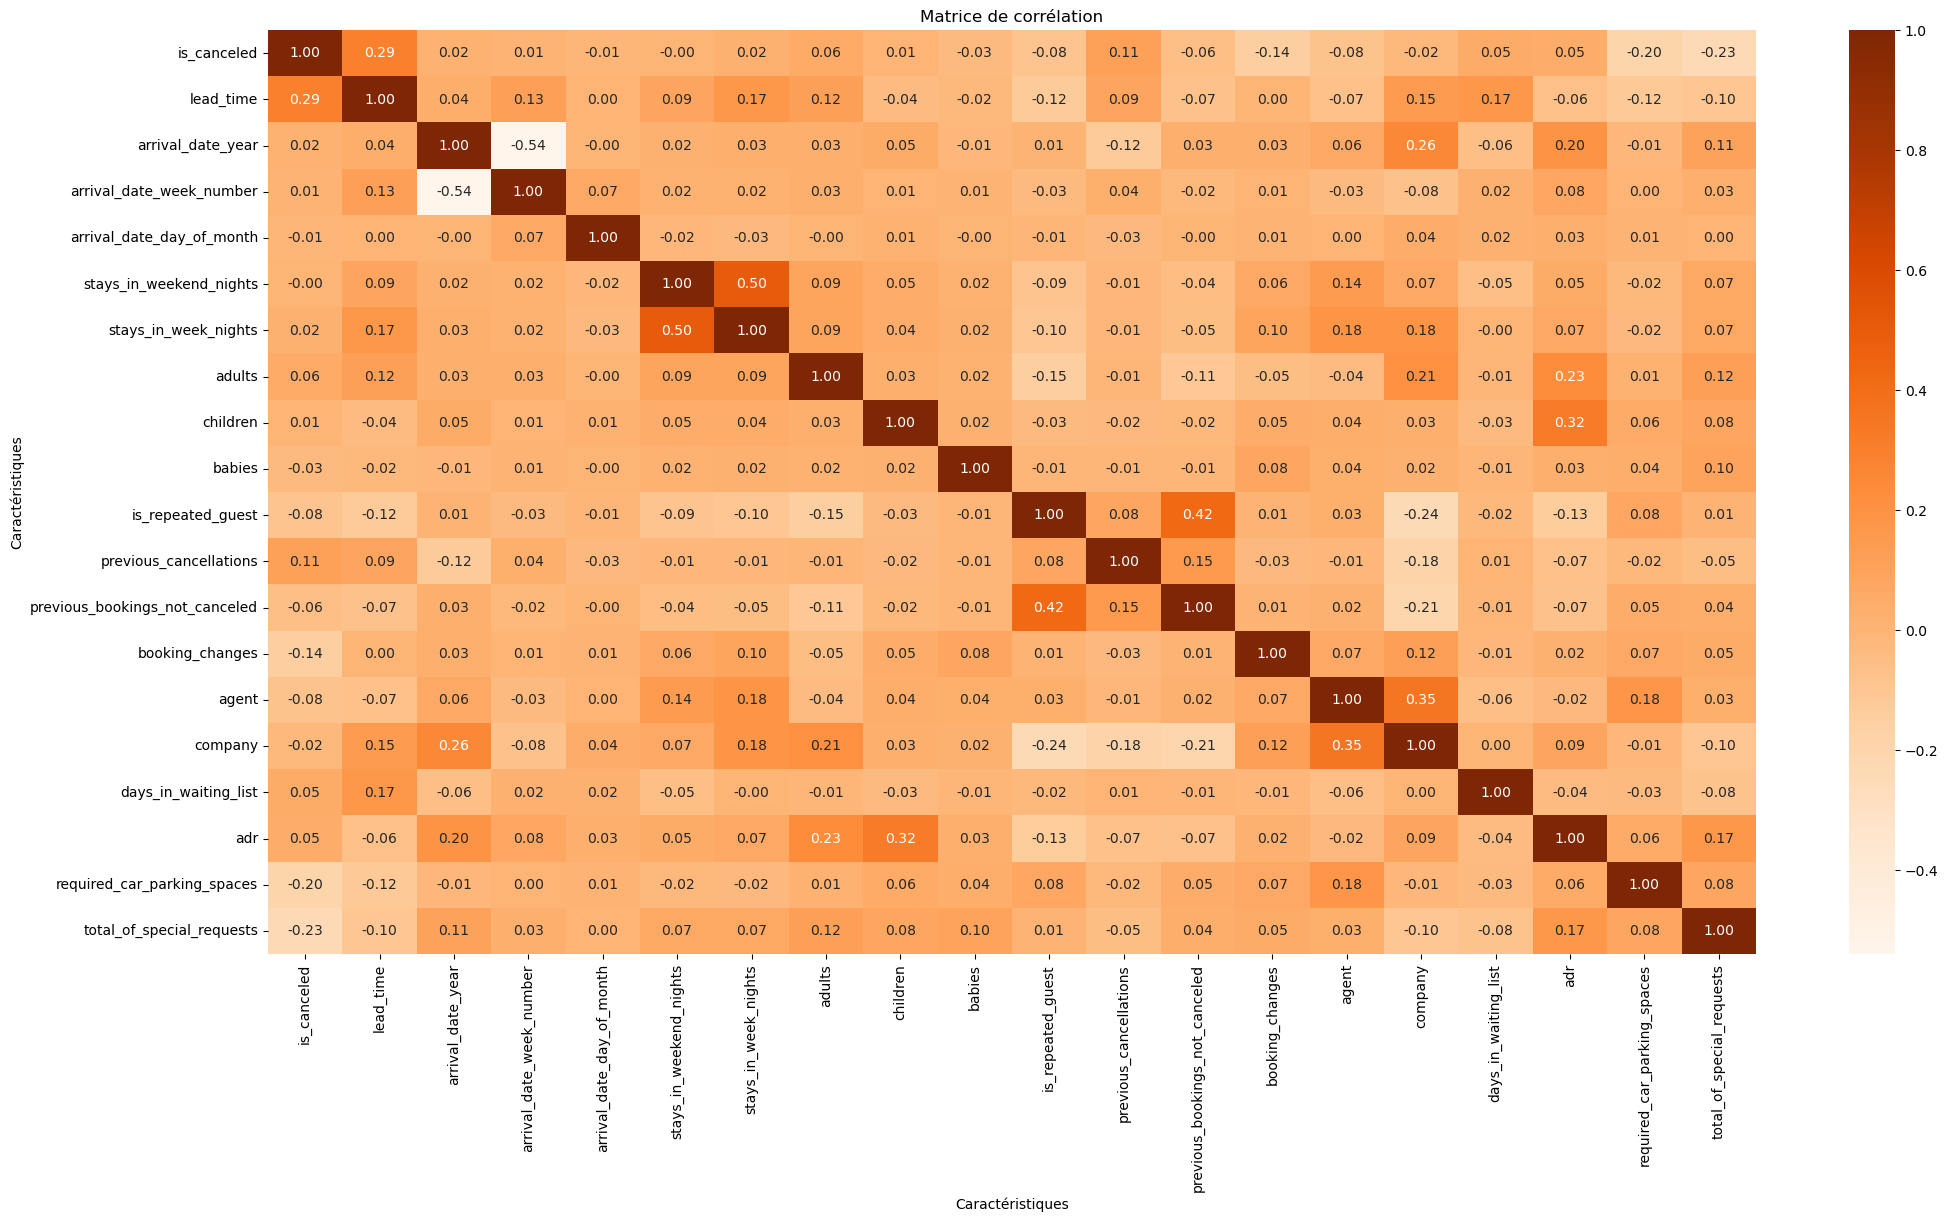

In [33]:
# Sélection des colonnes numériques
numeric_data = data.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
matrice_corr = numeric_data.corr()

# Affichage de la heatmap avec les valeurs annotées
plt.figure(figsize=(24, 12))
sns.heatmap(matrice_corr, annot=True, cmap="Oranges", fmt=".2f")
plt.xlabel("Caractéristiques")
plt.ylabel("Caractéristiques")
plt.title("Matrice de corrélation")
plt.show()

# 3. Pré-traitement des données

In [34]:
data.fillna(0, inplace = True)

In [35]:
condition = (data["adults"] == 0) & (data["children"] == 0) & (data["babies"] == 0)
data = data[~condition]

In [36]:
# Sélection des colonnes numériques pour le calcul de corrélation
numeric_data = data.select_dtypes(include=[np.number])

# Calcul de la corrélation de la colonne "is_canceled" avec d'autres variables
corr_with_target = numeric_data.corr()["is_canceled"].sort_values(ascending=False)
print(corr_with_target)

is_canceled                       1.000000
lead_time                         0.292876
previous_cancellations            0.110139
adults                            0.058182
days_in_waiting_list              0.054301
adr                               0.046492
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
children                          0.004851
stays_in_weekend_nights          -0.001323
arrival_date_day_of_month        -0.005948
babies                           -0.032569
agent                            -0.046770
previous_bookings_not_canceled   -0.057365
company                          -0.083594
is_repeated_guest                -0.083745
booking_changes                  -0.144832
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64


In [37]:
# Opération de remplacement de valeurs

In [38]:
#columns_to_replace = ["children", "agent", "company"]
#data[columns_to_replace] = data[columns_to_replace].fillna(0)

In [39]:
columns_to_replace = ["children", "agent", "company"]
data.loc[:, columns_to_replace] = data[columns_to_replace].fillna(0)

In [40]:
data["meal"] = data["meal"].replace("Undefined", "SC")

In [41]:
# Nettoyage des données

In [42]:
data["adr"] = np.where(data["adr"] <0, np.nan, data["adr"])
data["adr"] = data["adr"].fillna(value = data["adr"].mean())

In [43]:
print(data["children"].unique())
print(data["children"].dtype)

[ 0.  1.  2. 10.  3.]
float64


In [44]:
data_numeriques = data.select_dtypes(exclude=['object'])
data_categorielle = data.select_dtypes(include=['object'])
colonnes_categorielles = data.select_dtypes(include=['object']).columns.tolist()

print(colonnes_categorielles)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [45]:
uniques_values_data = data[colonnes_categorielles].apply(lambda x: pd.unique(x))

print(uniques_values_data)
print("Toutes les valeurs possibles pour market_segment:",data["market_segment"].unique())

hotel                                             [Resort Hotel, City Hotel]
arrival_date_month         [July, August, September, October, November, D...
meal                                                        [BB, FB, HB, SC]
country                    [PRT, GBR, USA, ESP, IRL, FRA, 0, ROU, NOR, OM...
market_segment             [Direct, Corporate, Online TA, Offline TA/TO, ...
distribution_channel              [Direct, Corporate, TA/TO, Undefined, GDS]
reserved_room_type                               [C, A, D, E, G, F, H, L, B]
assigned_room_type                         [C, A, D, E, G, F, I, B, H, L, K]
deposit_type                            [No Deposit, Refundable, Non Refund]
customer_type                  [Transient, Contract, Transient-Party, Group]
reservation_status                            [Check-Out, Canceled, No-Show]
reservation_status_date    [2015-07-01, 2015-07-02, 2015-07-03, 2015-05-0...
dtype: object
Toutes les valeurs possibles pour market_segment: ['Direct' 'C

In [46]:
# One-Hot Encoding

In [47]:
# hotel [Resort Hotel, City Hotel]
# Correspondances d'encodage (pour référence)
# 0 = "Resort Hotel"
# 1 = "City Hotel"

data["hotel"] = data["hotel"].replace({"Resort Hotel": 0, "City Hotel":1})

In [48]:
# Label Encoding

In [49]:
# arrival_date_month
#"January":1,
#"February":2,
#"March":3,
#"April":4,
#"May":5,
#"June":6,
#"July":7,
#"August":8,
#"September":9,
#"October":10,
#"November":11,
#"December":12

data["arrival_date_month"] = data["arrival_date_month"].replace({"January":1,
                                                                 "February":2,
                                                                 "March":3,
                                                                 "April":4,
                                                                 "May":5,
                                                                 "June":6,
                                                                 "July":7,
                                                                 "August":8,
                                                                 "September":9,
                                                                 "October":10,
                                                                 "November":11,
                                                                 "December":12
                                                                })

In [50]:
# label_encoder.fit_transform est une bonne approche pour l'encodage à un détail près,
# on ne connait pas la table de correspondance, il faut comparer les valeurs encodées avec
# le nombre d'occurence dans le dataset pour retrouver la correspondance
# Exemple pour meal

correspondances = data['meal'].value_counts()
print(correspondances)

meal
BB    92236
HB    14458
SC    11718
FB      798
Name: count, dtype: int64


In [51]:
label_encoder = LabelEncoder()

# meal [BB, FB, HB, SC]
# Correspondances d'encodage (pour référence)
# 0 = "BB"
# 1 = "FB"
# 2 = "HB"
# 3 = "SC"

data["meal"] = label_encoder.fit_transform(data["meal"])



In [52]:
correspondances = data['meal'].value_counts()
print(correspondances)

# On voit que BB a 92236 occurences, ce qui correspond à l'encodage 0
#             HB a 14458 occurences, ce qui correspond à l'encodage 2
# ect...
# On remarque que la méthode replace est meilleure

meal
0    92236
2    14458
3    11718
1      798
Name: count, dtype: int64


In [53]:
# deposit_type [No Deposit, Refundable, Non Refund]
# Correspondances d'encodage (pour référence)
# 0 = "No Deposit"
# 1 = "Non Refund"
# 2 = "Refundable"

data["deposit_type"] = data["deposit_type"].replace({"No Deposit": 0, "Non Refund":1, "Refundable":2})

In [54]:
# market_segment ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups', 'Undefined' 'Aviation']
# Correspondances d'encodage (pour référence)
# 0 = "Direct"
# 1 = "Corporate"
# 2 = "Online TA"
# 3 = "Offline TA/TO"
# 4 = "Complementary"
# 5 = "Groups"
# 6 = "Undefined"
# 7 = "Aviation"

data["market_segment"] = data["market_segment"].replace({"Direct":0,
                                                        "Corporate":1,
                                                        "Online TA":2,
                                                        "Offline TA/TO":3,
                                                        "Complementary":4,
                                                        "Groups":5,
                                                         "Undefined":6,
                                                         "Aviation":7
                                                        })

In [55]:
#customer_type [Transient, Contract, Transient-Party, Group]
# Correspondances d'encodage (pour référence)
# 0 = "Contract"
# 1 = "Group"
# 2 = "Transient"
# 3 = "Transient-Party"

data["customer_type"] = data["customer_type"].replace({"Contract":0,
                                                      "Group":1,
                                                      "Transient":2,
                                                      "Transient-Party":3
                                                      })

In [56]:
# distribution_channel [Direct, Corporate, TA/TO, GDS]
# Correspondances d'encodage (pour référence)
# 0 = "Direct"
# 1 = "Corporate"
# 2 = "TA/TO"
# 3 = "GDS"

data["distribution_channel"] = data["distribution_channel"].replace({"Direct":0,
                                                                    "Corporate":1,
                                                                    "TA/TO":2,
                                                                    "GDS":3,
                                                                    "Undefined":4
                                                                    })

In [57]:
# reserved_room_type
data["reserved_room_type"] = data["reserved_room_type"].replace({"A":0,
                                                                 "B":1,
                                                                 "C":2,
                                                                 "D":3,
                                                                 "E":4,
                                                                 "F":5,
                                                                 "G":6,
                                                                 "H":7,
                                                                 "L":8
                                                                })

In [58]:
#assigned_room_type
#data["assigned_room_type"] = data["assigned_room_type"].replace({"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6,"H":7,"L":8,"I":9,"K":10})


In [59]:
# reservation_status_date
data[["reservation_status_year","reservation_status_month","reservation_status_day"]] = data["reservation_status_date"].str.split("-", expand=True).astype(int)

data.drop(columns=["reservation_status_date"], inplace=True)

In [60]:
uniques_values_data = data[["reservation_status_year", "reservation_status_month", "reservation_status_day"]].apply(lambda x: pd.unique(x))

print(uniques_values_data)

reservation_status_year                              [2015, 2014, 2016, 2017]
reservation_status_month              [7, 5, 4, 6, 3, 8, 9, 1, 11, 10, 12, 2]
reservation_status_day      [1, 2, 3, 6, 22, 23, 5, 7, 8, 11, 15, 16, 29, ...
dtype: object


In [61]:
print(data[["reservation_status_year", "reservation_status_month", "reservation_status_day"]].dtypes)

reservation_status_year     int32
reservation_status_month    int32
reservation_status_day      int32
dtype: object


In [62]:
# reservation_status_year [2014, 2015, 2016, 2017]
# Correspondances d'encodage (pour référence)
# 0 = 2014
# 1 = 2015
# 2 = 2016
# 3 = 2017

data["reservation_status_year"] = data["reservation_status_year"].replace({2014:0,
                                    2015:1,
                                    2016:2,
                                    2017:3
                                    })

print(data["reservation_status_year"])

0         1
1         1
2         1
3         1
4         1
         ..
119385    3
119386    3
119387    3
119388    3
119389    3
Name: reservation_status_year, Length: 119210, dtype: int32


In [63]:
# Normalisation
# En utilisant le modèle de régression logistique,
# Je me rend compte qu'il y a un problème au niveau
# des dispersions des valeurs.
# En effet, on me demande soit d'augmenter le nombre
# d'itération ou bien de faire une mise à l'echelle

In [64]:
data_numeriques.drop("is_canceled", axis=1, inplace=True)
data_numeriques

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,0,104.40,0,0


In [65]:
# Sélection des colonnes numériques
numeric_columns = data.select_dtypes(include=[np.number])

# Calcul de la variance pour les colonnes numériques
variance = numeric_columns.var()

In [66]:
print(variance)

hotel                                 0.223085
is_canceled                           0.233300
lead_time                         11422.361808
arrival_date_year                     0.500535
arrival_date_month                    9.546842
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
meal                                  1.080406
market_segment                        2.018805
distribution_channel                  0.458311
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
reserved_room_type                    2.874866
booking_changes                       0.407688
deposit_type                          0.112155
agent        

In [67]:
data["lead_time"] = np.log(data["lead_time"]+1)
data["adr"] = np.log(data["adr"]+1)

In [68]:
# Sélection des colonnes numériques
numeric_columns = data.select_dtypes(include=[np.number])

# Calcul de la variance pour les colonnes numériques
variance = numeric_columns.var()
print(variance)

hotel                                 0.223085
is_canceled                           0.233300
lead_time                             2.582757
arrival_date_year                     0.500535
arrival_date_month                    9.546842
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
meal                                  1.080406
market_segment                        2.018805
distribution_channel                  0.458311
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
reserved_room_type                    2.874866
booking_changes                       0.407688
deposit_type                          0.112155
agent        

# 4. Post-Exploration EDA

In [69]:
# Affichage des premières lignes du df "data" pour visualiser les données
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day
0,0,0,5.837730,2015,7,27,1,0,0,2,...,0.0,0,2,0.000000,0,0,Check-Out,1,7,1
1,0,0,6.603944,2015,7,27,1,0,0,2,...,0.0,0,2,0.000000,0,0,Check-Out,1,7,1
2,0,0,2.079442,2015,7,27,1,0,1,1,...,0.0,0,2,4.330733,0,0,Check-Out,1,7,2
3,0,0,2.639057,2015,7,27,1,0,1,1,...,0.0,0,2,4.330733,0,0,Check-Out,1,7,2
4,0,0,2.708050,2015,7,27,1,0,2,2,...,0.0,0,2,4.595120,0,1,Check-Out,1,7,3


In [70]:
# Affichage des dimensions (nb lignes, nb colonnes)
data.shape

(119210, 34)

In [71]:
# Affichage des noms des colonnes
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_year',
       'reservation_status_month', 'reservation_status_day'],
      dtype='object')

In [72]:
data.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_year,reservation_status_month,reservation_status_day
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.664063,0.370766,3.843172,2016.156472,6.552051,27.163376,15.798717,0.927053,2.499195,1.859206,...,74.889078,10.735400,2.321215,2.137321,4.482275,0.062553,0.571504,2.093549,6.333630,15.666278
std,0.472319,0.483012,1.607096,0.707485,3.089796,13.601107,8.781070,0.995117,1.897106,0.575186,...,107.168884,53.830143,17.598002,0.577101,0.717967,0.245360,0.792876,0.715306,3.345818,8.778871
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,2.944439,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,7.000000,0.000000,0.000000,2.000000,4.255613,0.000000,0.000000,2.000000,3.000000,8.000000
50%,1.000000,0.000000,4.248495,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,9.000000,0.000000,0.000000,2.000000,4.563827,0.000000,0.000000,2.000000,6.000000,16.000000
75%,1.000000,1.000000,5.087596,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,...,152.000000,0.000000,0.000000,2.000000,4.844187,0.000000,1.000000,3.000000,9.000000,23.000000
max,1.000000,1.000000,6.603944,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,...,535.000000,543.000000,391.000000,3.000000,8.594339,8.000000,5.000000,3.000000,12.000000,31.000000


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  int64  
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  float64
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal                 

In [74]:
# Nombre de features dans notre dataframe
nb_features = data.shape[1]
print("Nombre de features:", nb_features)

# Nombre d'enregistrement
nb_enregistrements = data.shape[0]
print("Nombre d'enregistrements:", nb_enregistrements)

# Nombre de valeurs manquantes
nb_total_valeurs_manquantes = data.isnull().sum().sum()
print("Valeurs manquantes:", nb_total_valeurs_manquantes)

# Nombre total de cellules
nb_total_cellules = data.size

# Pourcentage de valeurs manquantes par rapport au nombre total de
# cellules
pourcentage_valeurs_manquantes = (nb_total_valeurs_manquantes / nb_total_cellules) * 100
print("Valeurs manquantes (%):", round(pourcentage_valeurs_manquantes,2))

# Variables qualitatives
features_qualitatives = data.select_dtypes(exclude="number").columns
nb_features_qualitatives = len(features_qualitatives)
print("Features qualitatives:", nb_features_qualitatives)

# Variables quantitatives (numériques)
features_quantitatives = data.select_dtypes(include="number").columns
nb_features_quantitatives = len(features_quantitatives)
print("Features quantitatives:", nb_features_quantitatives)

Nombre de features: 34
Nombre d'enregistrements: 119210
Valeurs manquantes: 0
Valeurs manquantes (%): 0.0
Features qualitatives: 3
Features quantitatives: 31


In [75]:
# Calculer le nombre de valeurs nulles par features
null_counts = data.isnull().sum()

# Calculer le pourcentage de valeurs nulles par colonne
null_pourcentage = null_counts / len(data) *100

# Créer un DataFrame pour stocker les résultats

null_df = pd.DataFrame({"Valeurs nulles:" : null_counts, "Pourcentage de valeurs nulles:": null_pourcentage})
print(null_df)

                                Valeurs nulles:  \
hotel                                         0   
is_canceled                                   0   
lead_time                                     0   
arrival_date_year                             0   
arrival_date_month                            0   
arrival_date_week_number                      0   
arrival_date_day_of_month                     0   
stays_in_weekend_nights                       0   
stays_in_week_nights                          0   
adults                                        0   
children                                      0   
babies                                        0   
meal                                          0   
country                                       0   
market_segment                                0   
distribution_channel                          0   
is_repeated_guest                             0   
previous_cancellations                        0   
previous_bookings_not_canceled 

In [76]:
# Calculer le nombre de valeurs uniques par features
unique_counts = data.apply(lambda col: col.nunique())


# Créer un DataFrame pour stocker les résultats

unique_df = pd.DataFrame({"Uniques Values:" : unique_counts})
print(unique_df)

                                Uniques Values:
hotel                                         2
is_canceled                                   2
lead_time                                   479
arrival_date_year                             3
arrival_date_month                           12
arrival_date_week_number                     53
arrival_date_day_of_month                    31
stays_in_weekend_nights                      17
stays_in_week_nights                         33
adults                                       14
children                                      5
babies                                        5
meal                                          4
country                                     178
market_segment                                8
distribution_channel                          5
is_repeated_guest                             2
previous_cancellations                       15
previous_bookings_not_canceled               73
reserved_room_type                      

In [77]:
# Liste des colonnes spécifiques à partir desquelles les valeurs uniques seront extraites
colonnes_specifiques = ['hotel', 'is_canceled', 'arrival_date_year', 'adults', 'children', 'babies',
                        'meal', 'deposit_type', 'customer_type', 'reservation_status',
                        'required_car_parking_spaces', 'total_of_special_requests', 'distribution_channel', 'reserved_room_type','assigned_room_type']

# Extraction des valeurs uniques pour chaque colonne
uniques_values_data = data[colonnes_specifiques].apply(lambda x: pd.unique(x))

# Affichage des valeurs uniques pour chaque colonne
print(uniques_values_data)

hotel                                                                     [0, 1]
is_canceled                                                               [0, 1]
arrival_date_year                                             [2015, 2016, 2017]
adults                         [2, 1, 3, 4, 40, 26, 50, 27, 55, 20, 6, 5, 10, 0]
children                                              [0.0, 1.0, 2.0, 10.0, 3.0]
babies                                                          [0, 1, 2, 10, 9]
meal                                                                [0, 1, 2, 3]
deposit_type                                                           [0, 2, 1]
customer_type                                                       [2, 0, 3, 1]
reservation_status                                [Check-Out, Canceled, No-Show]
required_car_parking_spaces                                      [0, 1, 2, 8, 3]
total_of_special_requests                                     [0, 1, 3, 2, 4, 5]
distribution_channel        

<Axes: >

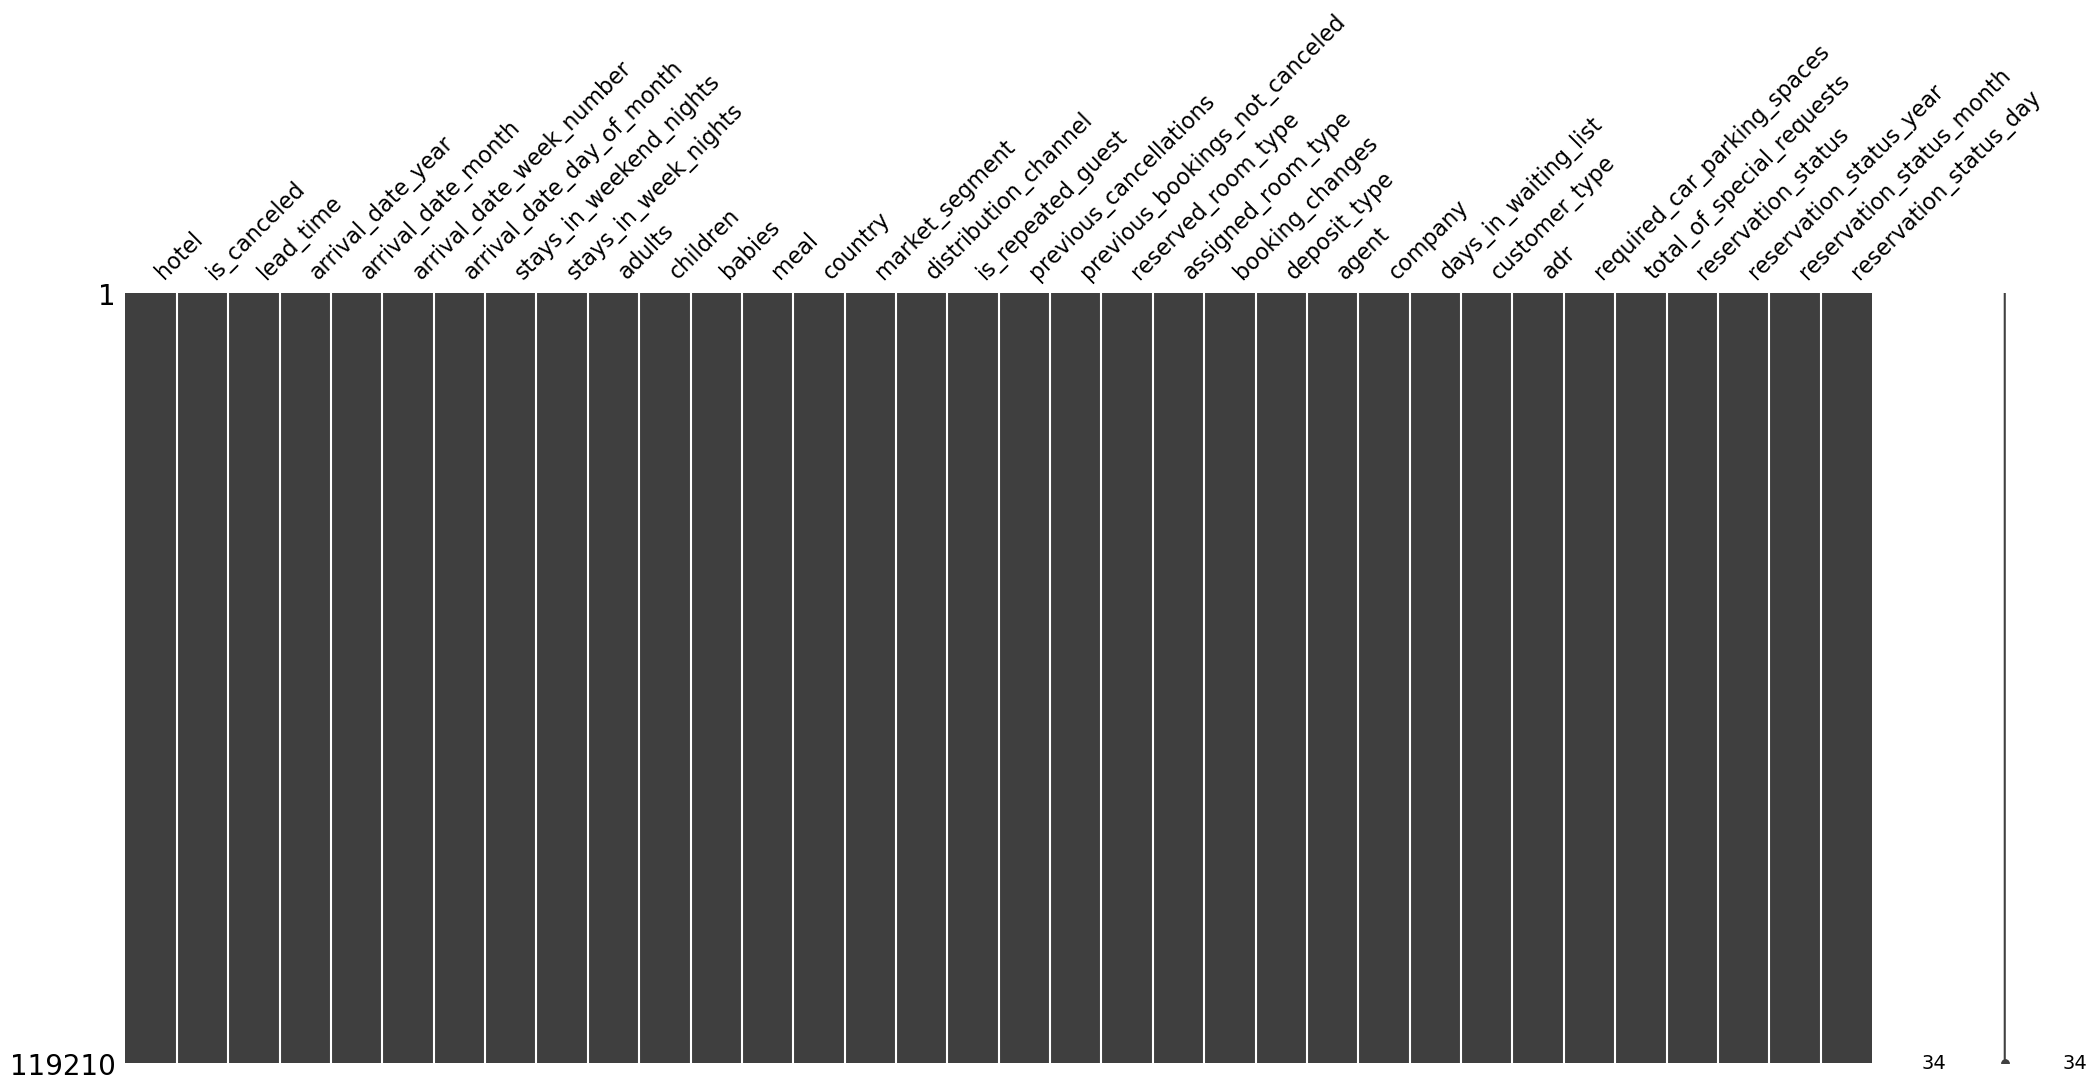

In [78]:
msno.matrix(data)

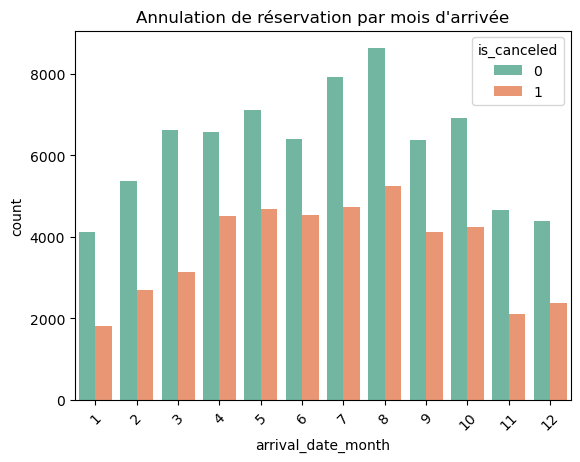

In [79]:
# Diagramme à barres pour les annulations par mois d'arrivée
sns.countplot(x="arrival_date_month", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par mois d'arrivée")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Distribution du ADR')

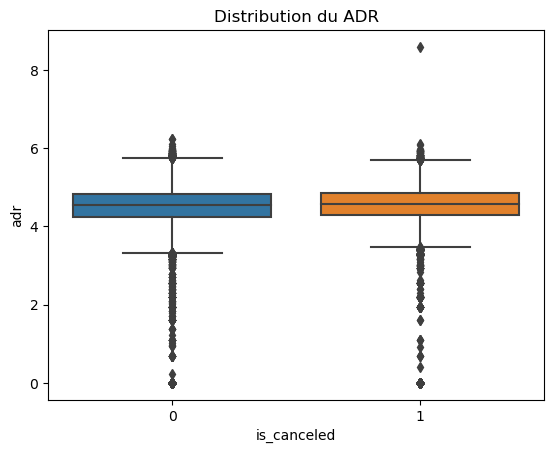

In [80]:
# Diagramme en boîte pour les tarifs journaliers (ADR)
sns.boxplot(x="is_canceled", y="adr", data=data)
plt.title("Distribution du ADR")

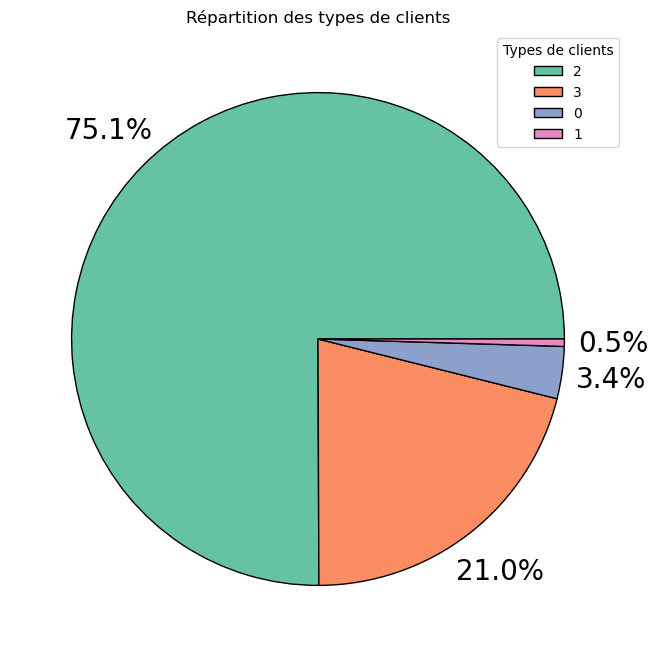

In [81]:
# Diagramme circulaire de la répartition des types de clients
plt.figure(figsize=(8,8))
plt.pie(data["customer_type"].value_counts(), autopct="%1.1f%%", colors=sns.color_palette("Set2"), wedgeprops={"linewidth":1, "edgecolor": "black"}, textprops={"fontsize":20}, pctdistance=1.2)
plt.title("Répartition des types de clients")
plt.legend(data["customer_type"].value_counts().index, title="Types de clients", loc="upper right")
plt.show()

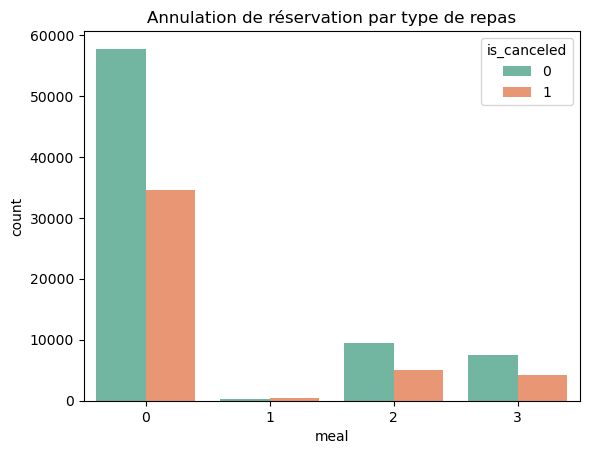

In [82]:
# Diagramme à barre des annulations de réservation par type de repas
sns.countplot(x="meal", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par type de repas")
plt.show()

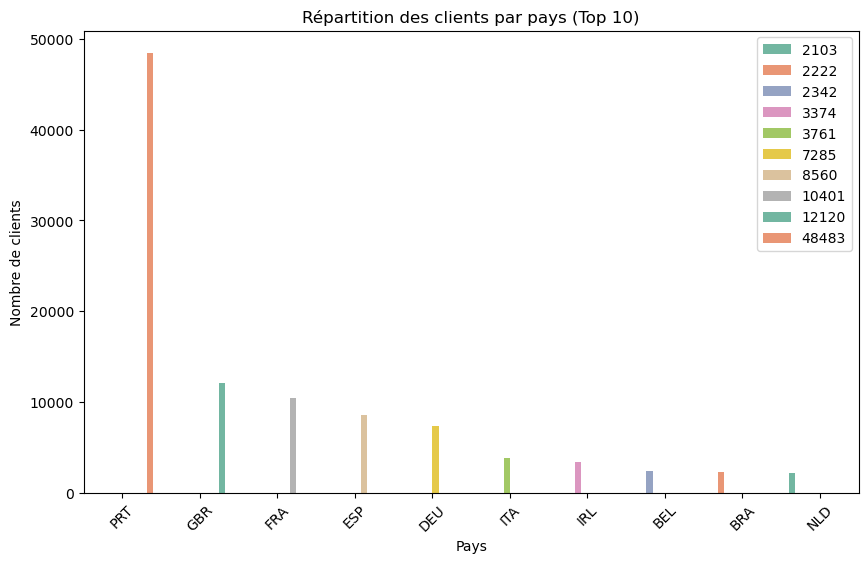

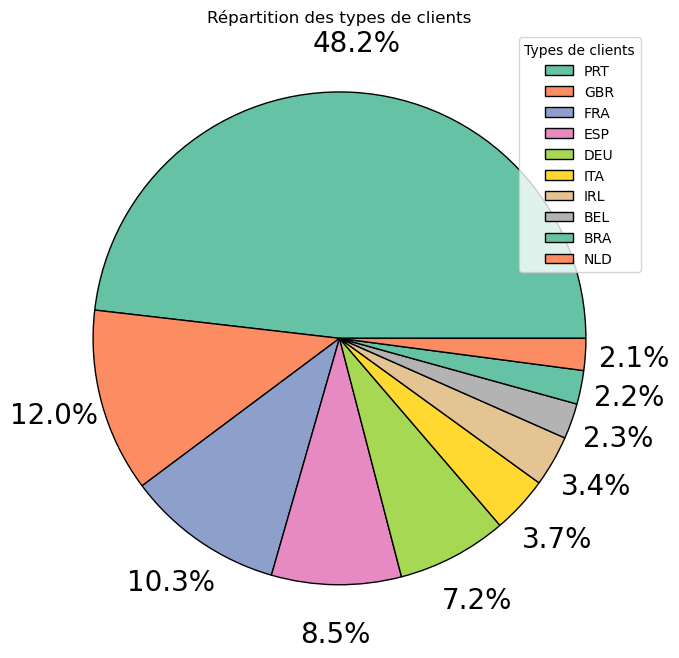

In [83]:
top_countries = data['country'].value_counts().head(10)

# Diagramme à barre de la répartition des clients par pays (Top 10 des pays)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Set2", hue=top_countries.values)
plt.title("Répartition des clients par pays (Top 10)")
plt.xlabel("Pays")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)
plt.show()

# Diagramme circulaire de la répartition des clients pas pays
plt.figure(figsize=(8,8))
plt.pie(top_countries, autopct="%1.1f%%", colors=sns.color_palette("Set2"), wedgeprops={"linewidth":1, "edgecolor": "black"}, textprops={"fontsize":20}, pctdistance=1.2)
plt.title("Répartition des types de clients")
plt.legend(top_countries.index, title="Types de clients", loc="upper right")
plt.show()

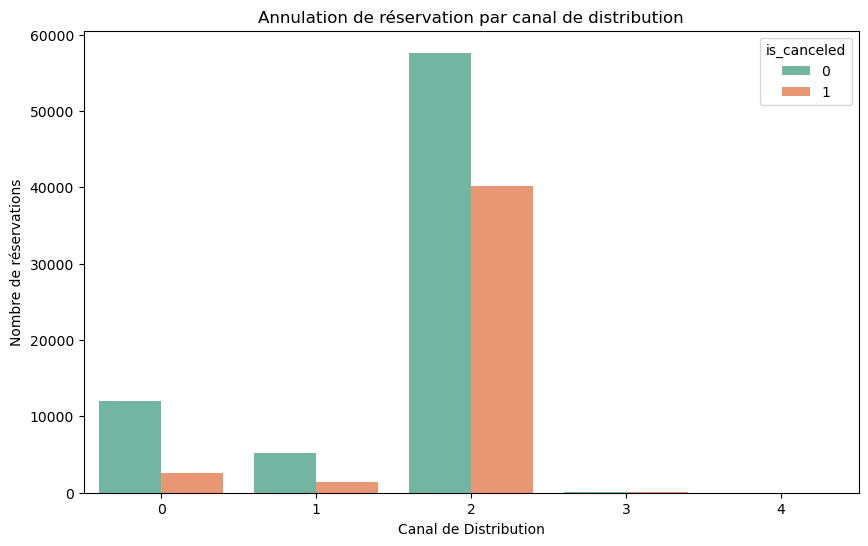

In [84]:
# Diagramme à barre des annulations de réservations par canal de distribution
plt.figure(figsize=(10,6))
sns.countplot(x="distribution_channel", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par canal de distribution")
plt.xlabel("Canal de Distribution")
plt.ylabel("Nombre de réservations")
plt.legend(title="is_canceled")
plt.show()

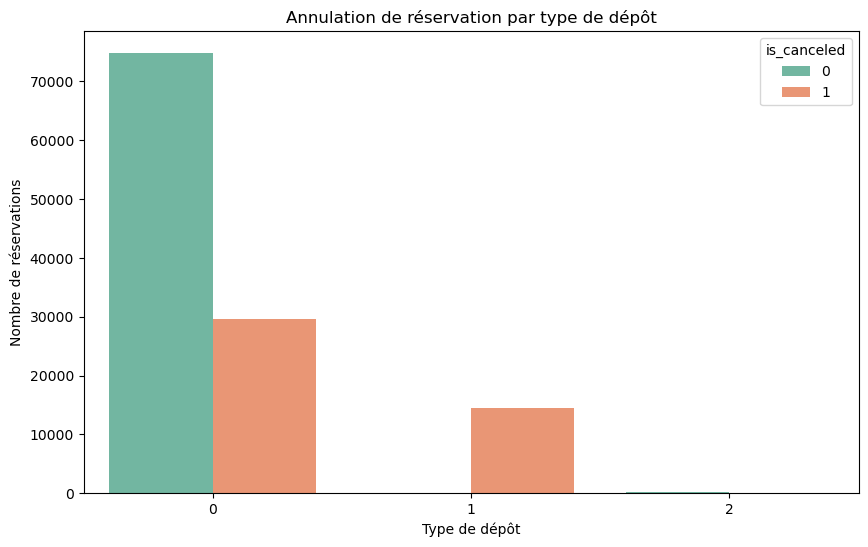

In [85]:
# Diagramme à barre des annulations de réservation par type de dépôt
plt.figure(figsize=(10,6))
sns.countplot(x="deposit_type", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par type de dépôt")
plt.xlabel("Type de dépôt")
plt.ylabel("Nombre de réservations")
plt.show()

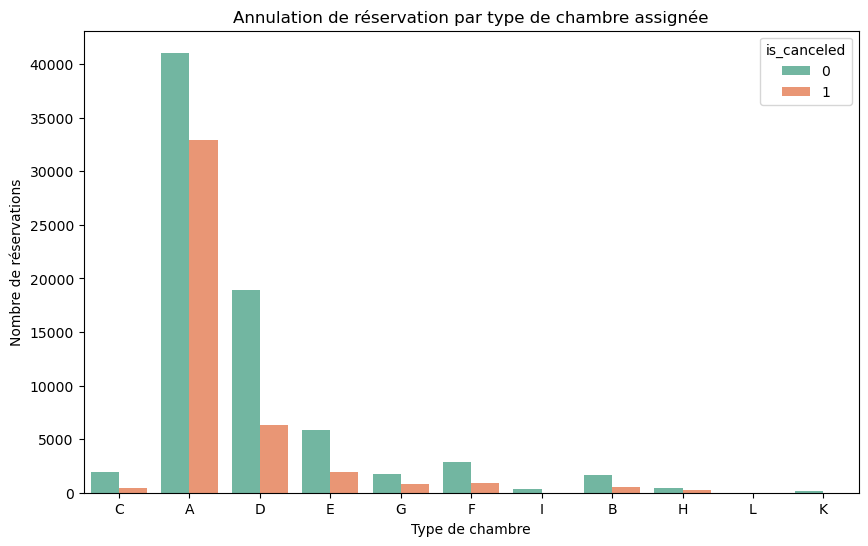

In [86]:
# Diagramme à barre des annulations de réservation par type de chambre assignée
plt.figure(figsize=(10,6))
sns.countplot(x="assigned_room_type", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par type de chambre assignée")
plt.xlabel("Type de chambre")
plt.ylabel("Nombre de réservations")
plt.show()

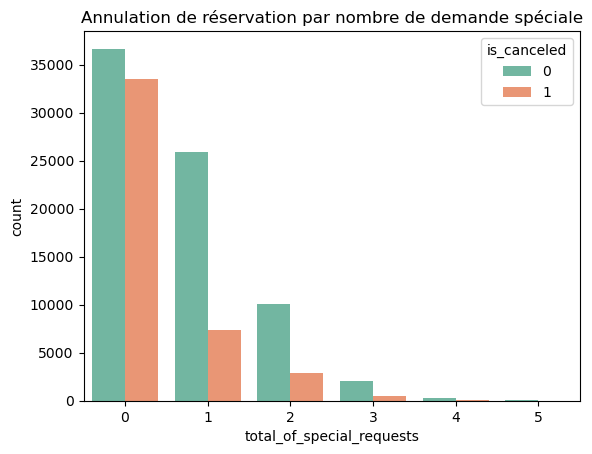

In [87]:
# Diagramme à barre des annulations de réservation par nombre de demande spéciale
sns.countplot(x="total_of_special_requests", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par nombre de demande spéciale")
plt.show()

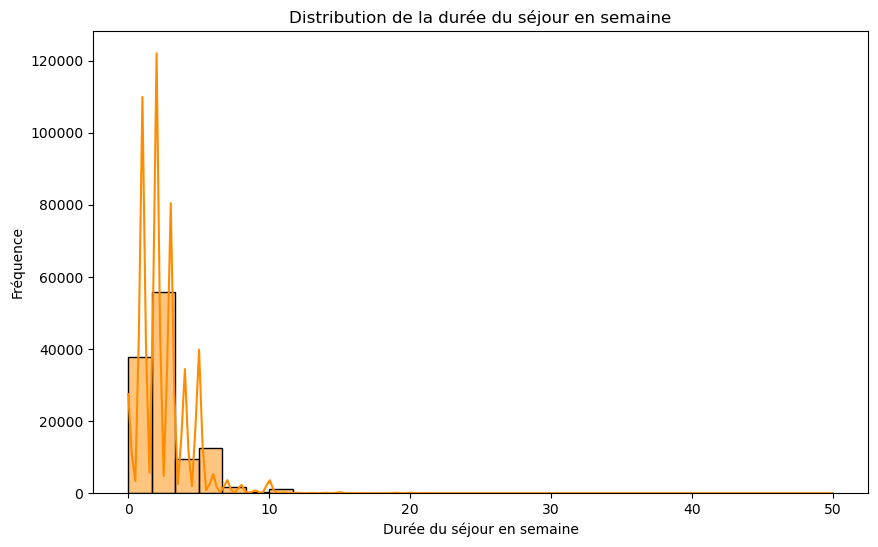

In [88]:
# Histogramme de la durée du séjour en semaine
plt.figure(figsize=(10,6))
sns.histplot(data=data, x="stays_in_week_nights", bins=30, kde=True, color="darkorange")
plt.title("Distribution de la durée du séjour en semaine")
plt.xlabel("Durée du séjour en semaine")
plt.ylabel("Fréquence")
plt.show()

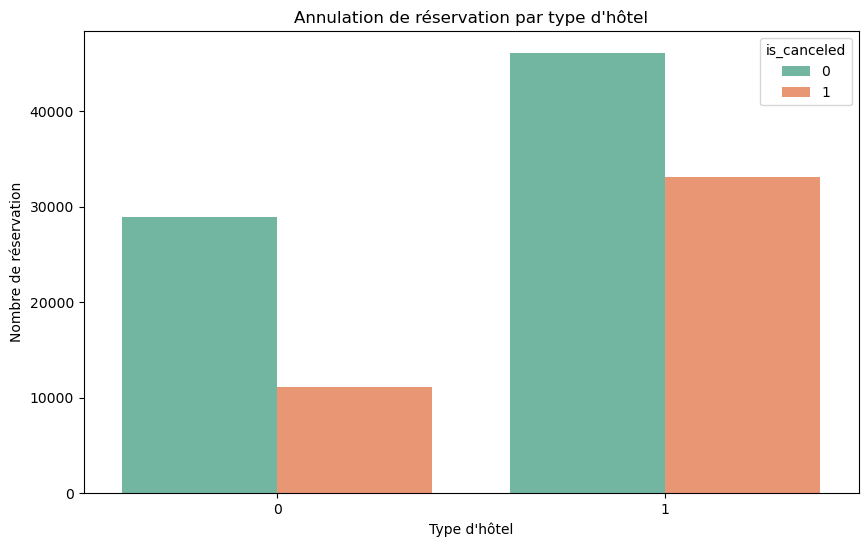

In [89]:
# Diagramme à barre des annulations de réservation par type d'hôtel
plt.figure(figsize=(10,6))
sns.countplot(x="hotel", hue="is_canceled", data=data, palette="Set2")
plt.title("Annulation de réservation par type d'hôtel")
plt.xlabel("Type d'hôtel")
plt.ylabel("Nombre de réservation")
plt.show()

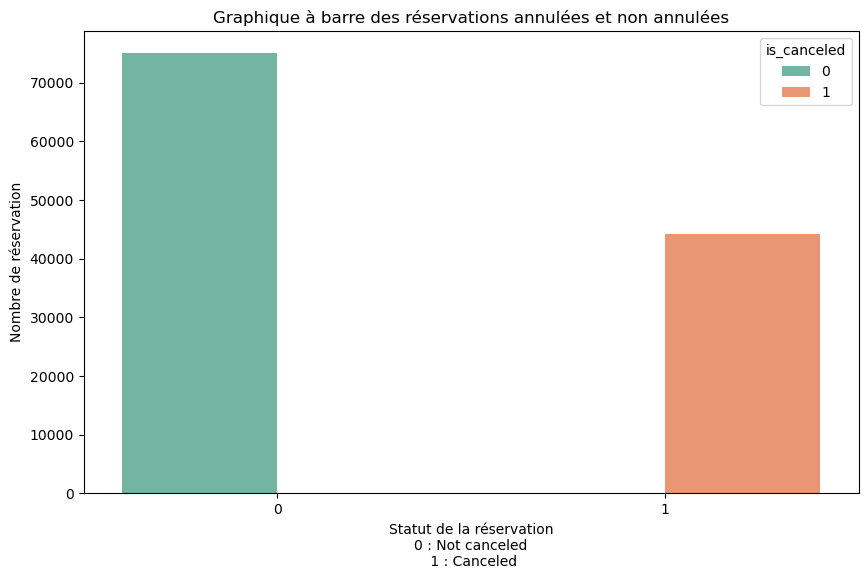

In [90]:
# Diagramme à barre des réservations annulées et non annulées

plt.figure(figsize=(10,6))
sns.countplot(x="is_canceled", data=data, palette="Set2", hue=data["is_canceled"])
plt.title("Graphique à barre des réservations annulées et non annulées")
plt.xlabel("Statut de la réservation\n0 : Not canceled\n 1 : Canceled")
plt.ylabel("Nombre de réservation")
plt.show()

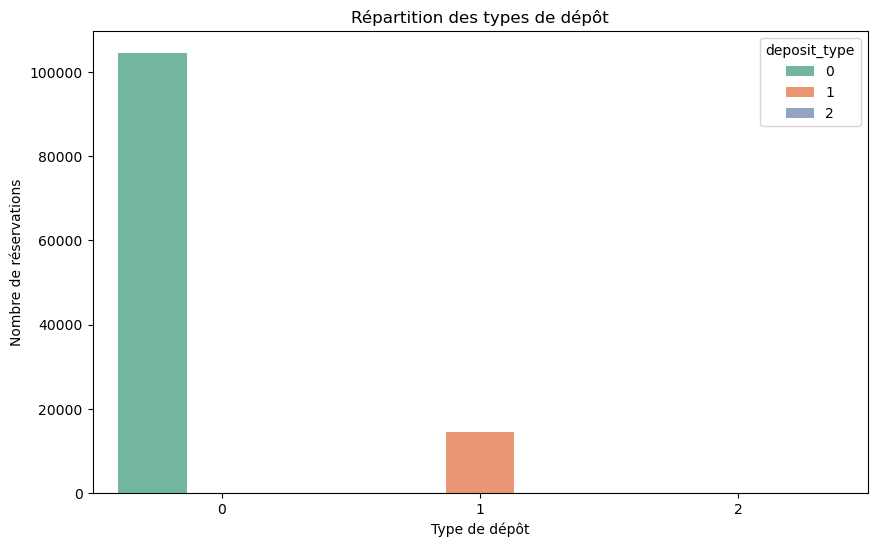

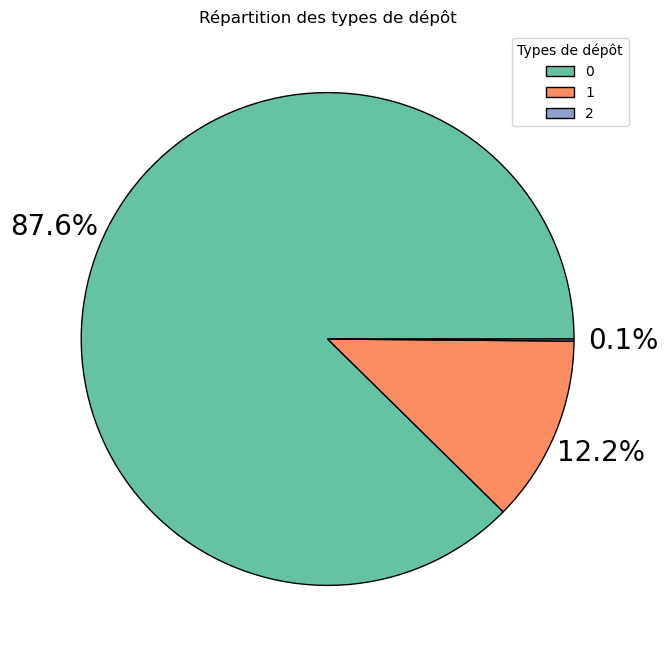

In [91]:
# Compter le nombre de réservations pour chaque type de dépôt
deposit_counts = data['deposit_type'].value_counts()

# Diagramme à barre de la répartition des types de dépôt
plt.figure(figsize=(10,6))
sns.barplot(x=deposit_counts.index, y=deposit_counts, palette="Set2", hue=deposit_counts.index)
plt.title("Répartition des types de dépôt")
plt.xlabel("Type de dépôt")
plt.ylabel("Nombre de réservations")
plt.show()

# Diagramme circulaire de la répartition des types de dépôt
plt.figure(figsize=(8,8))
plt.pie(deposit_counts, autopct="%1.1f%%", colors=sns.color_palette("Set2"), wedgeprops={"linewidth":1, "edgecolor": "black"}, textprops={"fontsize":20}, pctdistance=1.2)
plt.title("Répartition des types de dépôt")
plt.legend(deposit_counts.index, title="Types de dépôt", loc="upper right")
plt.show()

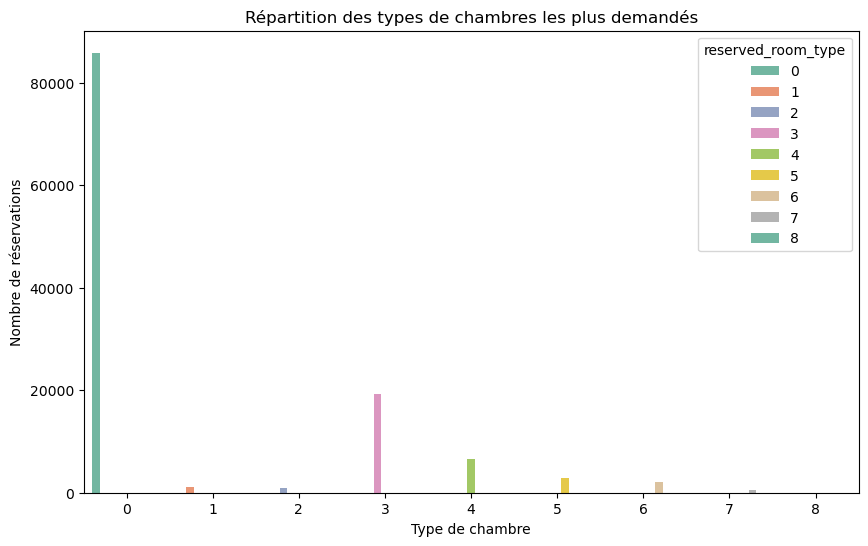

In [92]:
# Compter le nombre de réservations pour chaque type de chambre
room_type_counts = data['reserved_room_type'].value_counts()

# Diagramme à barres pour visualiser les types de chambres les plus demandés
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette="Set2", hue=room_type_counts.index)
plt.title("Répartition des types de chambres les plus demandés")
plt.xlabel("Type de chambre")
plt.ylabel("Nombre de réservations")
plt.xticks(rotation=0)
plt.show()

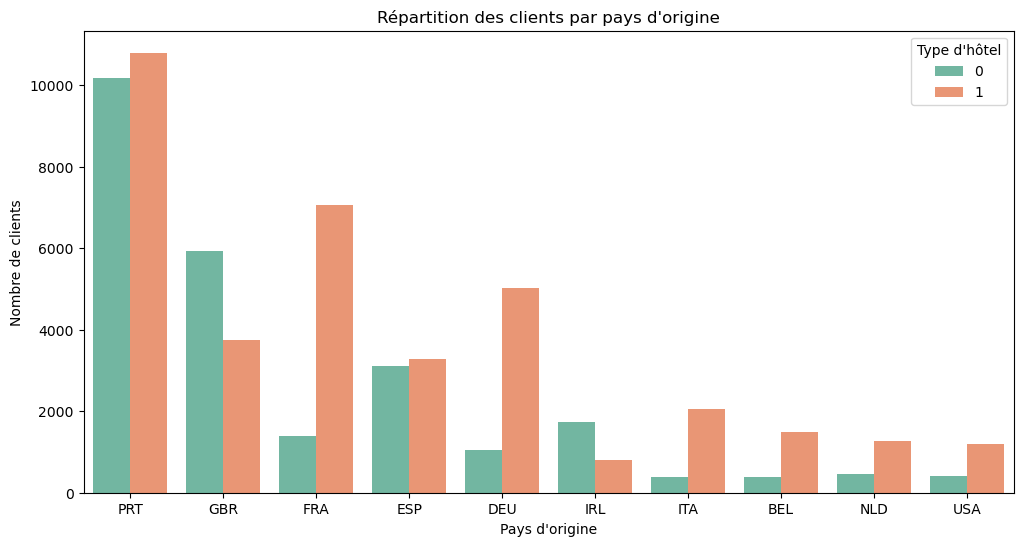

In [93]:
# Filtrer les lignes où is_canceled est égal à 0
non_canceled_data = data[data["is_canceled"] == 0]

# Diagramme à barres pour les deux types d'hôtels
plt.figure(figsize=(12, 6))
sns.countplot(data=non_canceled_data, x="country", hue="hotel", order=non_canceled_data["country"].value_counts().index[:10], palette="Set2")
plt.title("Répartition des clients par pays d'origine")
plt.xlabel("Pays d'origine")
plt.ylabel("Nombre de clients")
plt.legend(title="Type d'hôtel", loc='upper right')
plt.show()

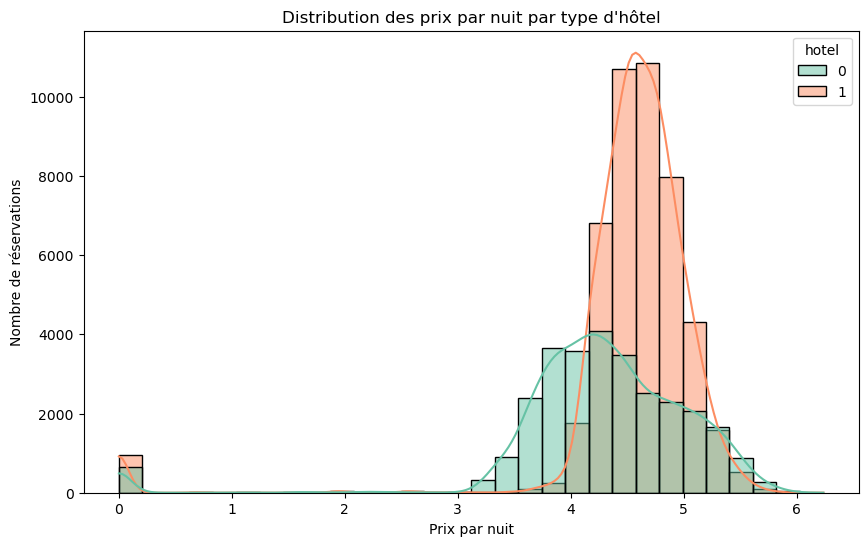

In [94]:
# Histogramme de la distribution des prix par nuit par type d'hôtel
plt.figure(figsize=(10, 6))
sns.histplot(data=non_canceled_data, x="adr", bins=30, hue="hotel", palette="Set2", kde=True)
plt.title("Distribution des prix par nuit par type d'hôtel")
plt.xlabel("Prix par nuit")
plt.ylabel("Nombre de réservations")
plt.show()

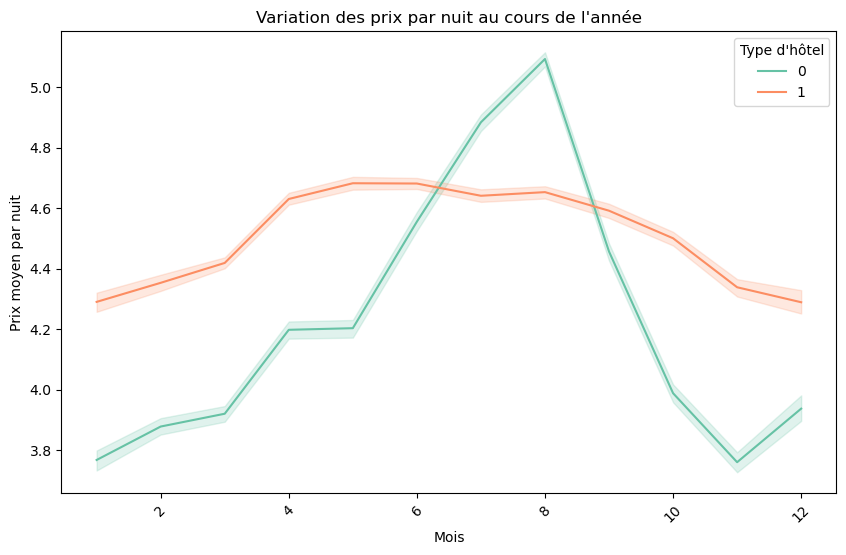

In [95]:
# Graphique de ligne représentant la variation des prix par nuit en fonction du mois, en distinguant les types d'hôtels
plt.figure(figsize=(10, 6))
sns.lineplot(data=non_canceled_data, x="arrival_date_month", y="adr", hue="hotel", markers=True, palette="Set2")
plt.title("Variation des prix par nuit au cours de l'année")
plt.xlabel("Mois")
plt.ylabel("Prix moyen par nuit")
plt.xticks(rotation=45)
plt.legend(title="Type d'hôtel", loc='upper right')
plt.show()

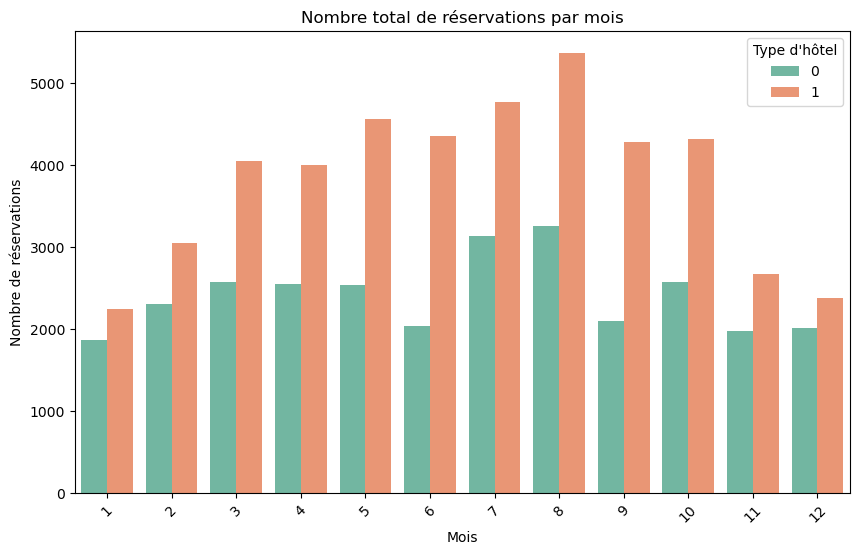

In [96]:
# Countplot représentant le nombre total de réservation par mois, en distinguant le type d'hôtel
plt.figure(figsize=(10, 6))
sns.countplot(data=non_canceled_data, x='arrival_date_month', hue='hotel', palette="Set2")
plt.title("Nombre total de réservations par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de réservations")
plt.xticks(rotation=45)
plt.legend(title="Type d'hôtel", loc='upper right')
plt.show()

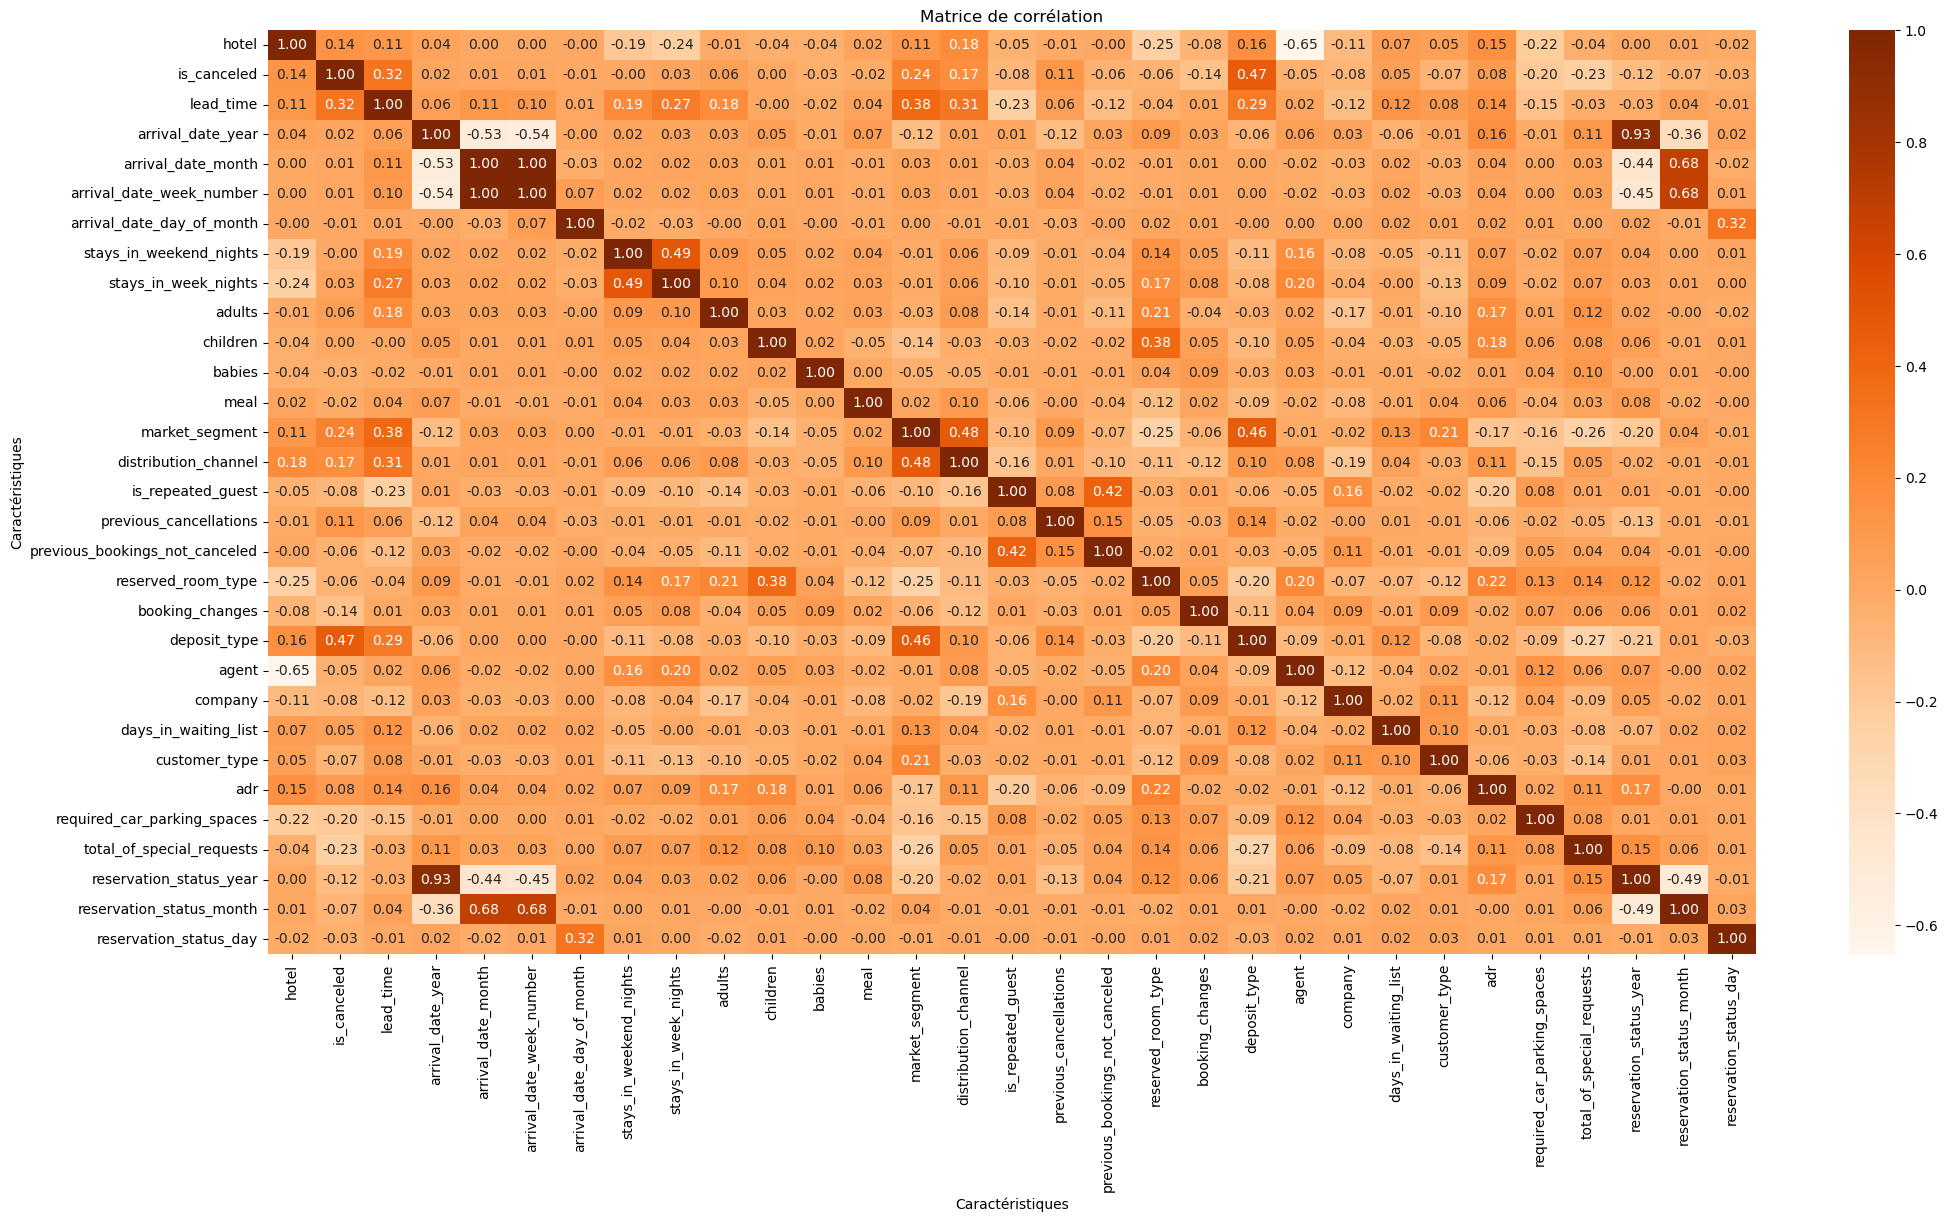

In [97]:
# Sélection des colonnes numériques
numeric_data = data.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
matrice_corr = numeric_data.corr()

# Affichage de la heatmap avec les valeurs annotées
plt.figure(figsize=(24, 12))
sns.heatmap(matrice_corr, annot=True, cmap="Oranges", fmt=".2f")
plt.xlabel("Caractéristiques")
plt.ylabel("Caractéristiques")
plt.title("Matrice de corrélation")
plt.show()

# 5. Développement des modèles

In [98]:
colonnes_inutiles = ['reservation_status',
                     'assigned_room_type',
                     'days_in_waiting_list', 
                     'arrival_date_year', 
                     'booking_changes',
                     'country']

data.drop(colonnes_inutiles, axis=1, inplace=True)

In [99]:
X = data.drop(columns=["is_canceled"])
y = data["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
X.shape, y.shape

((119210, 27), (119210,))

In [101]:
X.head()

,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_year,reservation_status_month,reservation_status_day
0,0,5.837730,7,27,1,0,0,2,0.0,0,...,0,0.0,0.0,2,0.000000,0,0,1,7,1
1,0,6.603944,7,27,1,0,0,2,0.0,0,...,0,0.0,0.0,2,0.000000,0,0,1,7,1
2,0,2.079442,7,27,1,0,1,1,0.0,0,...,0,0.0,0.0,2,4.330733,0,0,1,7,2
3,0,2.639057,7,27,1,0,1,1,0.0,0,...,0,304.0,0.0,2,4.330733,0,0,1,7,2
4,0,2.708050,7,27,1,0,2,2,0.0,0,...,0,240.0,0.0,2,4.595120,0,1,1,7,3


In [102]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_year,reservation_status_month,reservation_status_day
0,0,0,5.837730,7,27,1,0,0,2,0.0,...,0,0.0,0.0,2,0.000000,0,0,1,7,1
1,0,0,6.603944,7,27,1,0,0,2,0.0,...,0,0.0,0.0,2,0.000000,0,0,1,7,1
2,0,0,2.079442,7,27,1,0,1,1,0.0,...,0,0.0,0.0,2,4.330733,0,0,1,7,2
3,0,0,2.639057,7,27,1,0,1,1,0.0,...,0,304.0,0.0,2,4.330733,0,0,1,7,2
4,0,0,2.708050,7,27,1,0,2,2,0.0,...,0,240.0,0.0,2,4.595120,0,1,1,7,3


In [103]:
lr = LogisticRegression(max_iter=1000)

start_time = time.time()
lr.fit(X_train, y_train)
end_time = time.time()
lr_runtime = end_time - start_time

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
knn = KNeighborsClassifier()

start_time = time.time()
knn.fit(X_train.values, y_train.values)
end_time = time.time()
knn_runtime = end_time - start_time

In [105]:
dtc = DecisionTreeClassifier()

start_time = time.time()
dtc.fit(X_train, y_train)
end_time = time.time()
dtc_runtime = end_time - start_time

In [106]:
gnb = GaussianNB()

start_time = time.time()
gnb.fit(X_train, y_train)
end_time = time.time()
gnb_runtime = end_time - start_time

In [107]:
rfc = RandomForestClassifier()

start_time = time.time()
rfc.fit(X_train, y_train)
end_time = time.time()
rfc_runtime = end_time - start_time

In [108]:
ada = AdaBoostClassifier(estimator= dtc)

start_time = time.time()
ada.fit(X_train, y_train)
end_time = time.time()
ada_runtime = end_time - start_time

# 6. Test et évaluation des modèles

## **6.1 Logistic Regression**

In [109]:
y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_lr = confusion_matrix(y_test, y_pred_lr)

acc_lr_rounded = round(acc_lr, 2)
precision_lr_rounded = round(precision_lr, 2)
recall_lr_rounded = round(recall_lr, 2)
f1_lr_rounded = round(f1_lr, 2)

print("Accuracy (LR):", acc_lr_rounded)
print("Precision (LR):", precision_lr_rounded)
print("Recall (LR):", recall_lr_rounded)
print("F-1 Score (LR):", f1_lr_rounded)
print("\nMatrice de confusion (LR):\n", conf_lr)

Accuracy (LR): 0.81
Precision (LR): 0.88
Recall (LR): 0.58
F-1 Score (LR): 0.7

Matrice de confusion (LR):
 [[21432  1029]
 [ 5611  7691]]


In [110]:
# Faites des prédictions sur les données de test
y_pred_knn = knn.predict(X_test.values)

# Évaluez les performances du modèle KNN
acc_knn = accuracy_score(y_test, y_pred_knn)
conf_knn = confusion_matrix(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

acc_knn_rounded = round(acc_knn, 2)
precision_knn_rounded = round(precision_knn, 2)
recall_knn_rounded = round(recall_knn, 2)
f1_knn_rounded = round(f1_knn, 2)

print("Accuracy (KNN):", acc_knn_rounded)
print("Precision (KNN):", precision_knn_rounded)
print("Recall (KNN):", recall_knn_rounded)
print("F-1 Score (KNN):", f1_knn_rounded)
print("\nMatrice de confusion (KNN):\n", conf_knn)

Accuracy (KNN): 0.95
Precision (KNN): 0.99
Recall (KNN): 0.87
F-1 Score (KNN): 0.92

Matrice de confusion (KNN):
 [[22338   123]
 [ 1786 11516]]


In [111]:
y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf_dtc = confusion_matrix(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)

acc_dtc_rounded = round(acc_dtc, 2)
precision_dtc_rounded = round(precision_dtc, 2)
recall_dtc_rounded = round(recall_dtc, 2)
f1_dtc_rounded = round(f1_dtc, 2)

print("Accuracy (DTC):", acc_dtc_rounded)
print("Precision (DTC):", precision_dtc_rounded)
print("Recall (DTC):", recall_dtc_rounded)
print("F-1 Score (DTC):", f1_dtc_rounded)
print("\nMatrice de confusion (DTC):\n", conf_dtc)

Accuracy (DTC): 0.95
Precision (DTC): 0.94
Recall (DTC): 0.94
F-1 Score (DTC): 0.94

Matrice de confusion (DTC):
 [[21620   841]
 [  785 12517]]


In [112]:
y_pred_gnb = gnb.predict(X_test)

acc_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
conf_gnb = confusion_matrix(y_test, y_pred_gnb)

acc_gnb_rounded = round(acc_gnb, 2)
precision_gnb_rounded = round(precision_gnb, 2)
recall_gnb_rounded = round(recall_gnb, 2)
f1_gnb_rounded = round(f1_gnb, 2)

print("Accuracy (GNB):", acc_gnb_rounded)
print("Precision (GNB):", precision_gnb_rounded)
print("Recall (GNB):", recall_gnb_rounded)
print("F-1 Score (GNB):", f1_gnb_rounded)
print("\nMatrice de confusion (GNB):\n", conf_gnb)

Accuracy (GNB): 0.58
Precision (GNB): 0.46
Recall (GNB): 0.92
F-1 Score (GNB): 0.62

Matrice de confusion (GNB):
 [[ 8284 14177]
 [ 1002 12300]]


In [113]:
y_pred_rfc = rfc.predict(X_test)

acc_rfc = accuracy_score(y_test, y_pred_rfc)
conf_rfc = confusion_matrix(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)

acc_rfc_rounded = round(acc_rfc, 2)
precision_rfc_rounded = round(precision_rfc, 2)
recall_rfc_rounded = round(recall_rfc, 2)
f1_rfc_rounded = round(f1_rfc, 2)

print("Accuracy (RFC):", acc_rfc_rounded)
print("Precision (RFC):", precision_rfc_rounded)
print("Recall (RFC):", recall_rfc_rounded)
print("F-1 Score (RFC):", f1_rfc_rounded)
print("\nMatrice de confusion (RFC):\n", conf_rfc)

Accuracy (RFC): 0.96
Precision (RFC): 0.99
Recall (RFC): 0.9
F-1 Score (RFC): 0.94

Matrice de confusion (RFC):
 [[22339   122]
 [ 1376 11926]]


In [114]:
y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf_ada = confusion_matrix(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

acc_ada_rounded = round(acc_ada, 2)
precision_ada_rounded = round(precision_ada, 2)
recall_ada_rounded = round(recall_ada, 2)
f1_ada_rounded = round(f1_ada, 2)

print("Accuracy (ADA):", acc_ada_rounded)
print("Precision (ADA):", precision_ada_rounded)
print("Recall (ADA):", recall_ada_rounded)
print("F-1 Score (ADA):", f1_ada_rounded)
print("\nMatrice de confusion (ADA):\n", conf_ada)

Accuracy (ADA): 0.95
Precision (ADA): 0.94
Recall (ADA): 0.94
F-1 Score (ADA): 0.94

Matrice de confusion (ADA):
 [[21616   845]
 [  809 12493]]


# 7. Conclusion

In [115]:
models = pd.DataFrame({
    "Model" : ["Logistic Regression", "KNN", "Decision Tree Classifier","Naive Bayes", "Random Forest Classifier", "ADA Boost Classifier"],
    "Accuracy" : [acc_lr_rounded, acc_knn_rounded, acc_dtc_rounded, acc_gnb_rounded, acc_rfc_rounded, acc_ada_rounded],
    "Precision" : [precision_lr_rounded, precision_knn_rounded, precision_dtc_rounded, precision_gnb_rounded, precision_rfc_rounded, precision_ada_rounded],
    "Recall" : [recall_lr_rounded, recall_knn_rounded, recall_dtc_rounded, recall_gnb_rounded, recall_rfc_rounded, recall_ada_rounded],
    "F-1 Score" : [f1_lr_rounded, f1_knn_rounded, f1_dtc_rounded, f1_gnb_rounded, f1_rfc_rounded, f1_ada_rounded],
    "Runtime" : [lr_runtime, knn_runtime, dtc_runtime, gnb_runtime, rfc_runtime, ada_runtime ]
})


models.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy,Precision,Recall,F-1 Score,Runtime
4,Random Forest Classifier,0.96,0.99,0.90,0.94,11.706131
1,KNN,0.95,0.99,0.87,0.92,0.030560
2,Decision Tree Classifier,0.95,0.94,0.94,0.94,0.679639
5,ADA Boost Classifier,0.95,0.94,0.94,0.94,0.621176
0,Logistic Regression,0.81,0.88,0.58,0.70,4.635374
3,Naive Bayes,0.58,0.46,0.92,0.62,0.059909
